In [37]:
import numpy as np
# Se importan las librerias a usar y se espcifica un numero maximo de filas y columnas
import pandas as pd
import scipy.stats as sp
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", 50)

# 1. Procesamiento de datos:

## 1. Preparacion de datos
En esta etapa se analizan las caracteristicas principales del conjunto de datos, asi como también las dimensiones de calidad de estos (completitud, unicidad, consistencia, validez). Posteriormente, se limpian los datos y se transforman para la futura etapa de modelamiento.

In [38]:
# Datos estudio:
datos_estudio = pd.read_csv("./Datos/SECEC2021019Protocol_DATA_2024-02-09_0002.csv", encoding='utf-8')
datos_estudio_LABELS = pd.read_csv("./Datos/SECEC2021019Protocol_DATA_LABELS_2024-02-09_0002.csv", encoding='utf-8')

In [39]:
# Deberian tener el mismo número de filas:

# Comprobamos si tienen el mismo número de filas
if datos_estudio.shape[0] == datos_estudio_LABELS.shape[0]:
    print("Los DataFrames tienen el mismo número de filas.")
else:
    print("Los DataFrames no tienen el mismo número de filas.")

Los DataFrames tienen el mismo número de filas.


In [ ]:
# Ver conjunto de datos de caada fuente de datos:

# Se imprimen las primeras 50 filas del conjunto de datos:
datos_estudio.head(50)

record_id            id f_nacimiento   f_ingreso  edad  t_ingreso  sexo  \
0           1  1.014907e+09   2023-06-05  2023-10-12   5.0        2.0   1.0   
1           2  1.011264e+09   2022-10-15  2023-03-06   4.0        1.0   2.0   
2           3  1.014908e+09   2023-08-02  2023-12-07   4.0        2.0   2.0   
3           4  1.016920e+09   2019-05-07  2019-08-21   3.0        1.0   1.0   
4           5  1.013279e+09   2017-09-07  2018-03-23   6.0        1.0   1.0   
5           6  1.014895e+09   2017-04-13  2018-09-30  17.0        1.0   2.0   
6           7  1.014901e+09   2019-06-11  2019-08-21   2.0        1.0   1.0   
7           8  1.025156e+09   2019-05-03  2019-09-07   4.0        1.0   1.0   
8           9  1.141362e+09   2018-03-15  2020-01-13  21.0        2.0   2.0   
9          10  1.025562e+09   2017-12-27  2019-11-05  22.0        1.0   1.0   
10         11  1.014902e+09   2019-10-07  2020-02-03   3.0        2.0   1.0   
11         12  1.141359e+09   2017-08-04  2020-02-11  10.0        2.0   1.0   
12         13  1.016916e+09   2018-03-05  2020-02-23  23.0        1.0   2.0   
13         14  1.016921e+09   2019-10-17  2020-03-05   4.0        1.0   1.0   
14         15  1.016608e+09   2018-09-23  2020-02-28  12.0        1.0   1.0   
15         16  1.019847e+09   2017-06-22  2018-03-26   9.0        2.0   2.0   
16         17  1.019916e+09   2018-04-16  2018-10-05   5.0        2.0   2.0   
17         18  1.019916e+09   2018-02-20  2018-10-03   7.0        2.0   1.0   
18         19  1.014896e+09   2017-11-07  2019-06-28  19.0        1.0   1.0   
19         20  1.019847e+09   2017-07-13  2018-05-21  10.0        2.0   1.0   
20         21  1.016918e+09   2018-09-29  2019-03-21   5.0        2.0   2.0   
21         22           NaN          NaN         NaN   NaN        NaN   NaN   
22         23  1.023086e+09   2019-03-30  2019-07-05   3.0        2.0   1.0   
23         24  1.016914e+09   2017-05-30  2018-06-29  13.0        2.0   1.0   
24         25  1.123895e+09   2019-03-01  2019-07-15   4.0        2.0   2.0   
25         26  1.014900e+09   2019-03-22  2019-07-11   3.0        2.0   2.0   
26         27  1.014898e+09   2018-05-20  2019-06-17  12.0        2.0   2.0   
27         28  1.077168e+08   2018-12-26  2019-04-26   4.0        2.0   1.0   
28         29  1.014900e+09   2019-01-17  2019-04-04   2.0        1.0   1.0   
29         30  1.014901e+09   2019-05-30  2019-09-02   3.0        2.0   1.0   
30         31  1.014900e+09   2019-03-20  2019-09-03   5.0        2.0   2.0   
31         32  1.016919e+09   2019-01-13  2019-04-08   2.0        2.0   1.0   
32         33  1.025080e+09   2018-09-27  2018-12-29   3.0        1.0   1.0   
33         34  1.019917e+09   2018-05-29  2019-08-26  15.0        2.0   1.0   
34         35  1.031657e+09   2017-12-14  2018-01-18   1.0        1.0   2.0   
35         36  1.019919e+09   2019-07-27  2020-02-18   6.0        2.0   2.0   
36         37  6.490941e+08   2019-11-23  2020-03-24   4.0        1.0   1.0   
37         38  1.019913e+09   2016-07-18  2018-04-06  20.0        2.0   2.0   
38         39  1.016608e+09   2020-12-18  2021-02-17   2.0        2.0   1.0   
39         40  1.019919e+09   2019-07-27  2020-02-18   6.0        2.0   2.0   
40         41  1.019920e+09   2020-03-10  2021-04-22  13.0        2.0   2.0   
41         42  1.019850e+09   2021-03-29  2021-09-03   5.0        1.0   1.0   
42         43           NaN          NaN         NaN   NaN        NaN   NaN   
43         44  1.019919e+09   2019-12-03  2020-09-01   8.0        2.0   1.0   
44         45  1.011331e+09   2020-07-06  2021-03-04   7.0        1.0   2.0   
45         46  1.019850e+09   2021-03-29  2021-09-03   5.0        1.0   1.0   
46         47  1.014899e+09   2018-08-31  2020-08-06  23.0        2.0   1.0   
47         48  1.015487e+09   2020-12-01  2021-04-13   4.0        1.0   1.0   
48         49  1.145935e+09   2020-12-03  2022-11-23  23.0        1.0   1.0   
49         50  1.147490e+09   2020-04-20  2021-04-15  

In [ ]:
# Se imprimen las primeras 50 filas del conjunto de datos:
datos_estudio_LABELS.head(50)

Record ID  Número de Identificación del Paciente Fecha de Nacimiento  \
0           1                           1.014907e+09          2023-06-05   
1           2                           1.011264e+09          2022-10-15   
2           3                           1.014908e+09          2023-08-02   
3           4                           1.016920e+09          2019-05-07   
4           5                           1.013279e+09          2017-09-07   
5           6                           1.014895e+09          2017-04-13   
6           7                           1.014901e+09          2019-06-11   
7           8                           1.025156e+09          2019-05-03   
8           9                           1.141362e+09          2018-03-15   
9          10                           1.025562e+09          2017-12-27   
10         11                           1.014902e+09          2019-10-07   
11         12                           1.141359e+09          2017-08-04   
12         13                           1.016916e+09          2018-03-05   
13         14                           1.016921e+09          2019-10-17   
14         15                           1.016608e+09          2018-09-23   
15         16                           1.019847e+09          2017-06-22   
16         17                           1.019916e+09          2018-04-16   
17         18                           1.019916e+09          2018-02-20   
18         19                           1.014896e+09          2017-11-07   
19         20                           1.019847e+09          2017-07-13   
20         21                           1.016918e+09          2018-09-29   
21         22                                    NaN                 NaN   
22         23                           1.023086e+09          2019-03-30   
23         24                           1.016914e+09          2017-05-30   
24         25                           1.123895e+09          2019-03-01   
25         26                           1.014900e+09          2019-03-22   
26         27                           1.014898e+09          2018-05-20   
27         28                           1.077168e+08          2018-12-26   
28         29                           1.014900e+09          2019-01-17   
29         30                           1.014901e+09          2019-05-30   
30         31                           1.014900e+09          2019-03-20   
31         32                           1.016919e+09          2019-01-13   
32         33                           1.025080e+09          2018-09-27   
33         34                           1.019917e+09          2018-05-29   
34         35                           1.031657e+09          2017-12-14   
35         36                           1.019919e+09          2019-07-27   
36         37                           6.490941e+08          2019-11-23   
37         38                           1.019913e+09          2016-07-18   
38         39                           1.016608e+09          2020-12-18   
39         40                           1.019919e+09          2019-07-27   
40         41                           1.019920e+09          2020-03-10   
41         42                           1.019850e+09          2021-03-29   
42         43                                    NaN                 NaN   
43         44                           1.019919e+09          2019-12-03   
44         45                           1.011331e+09          2020-07-06   
45         46                           1.019850e+09          2021-03-29   
46         47                           1.014899e+09          2018-08-31   
47         48                           1.015487e+09          2020-12-01   
48         49                           1.145935e+09          2020-12-03   
49         50                           1.147490e+09          2020-04-20   

   Fecha de Ingreso al Servicio de Gastroenterología Pediatrica   \
0                                          2023-10-12      

In [42]:
# Se reemplaza la primera fila de un df por el df con etiquetas para mejorar la claridad:

datos_estudio.columns = datos_estudio_LABELS.columns
datos_estudio.replace('Unchecked', 0, inplace=True)
datos_estudio.replace('Checked', 1, inplace=True)

# Obtener una lista de nombres de columnas que contienen el string especifico de si estan completas o no:
columnas_a_eliminar = [columna for columna in datos_estudio.columns if 'Complete?' in columna]

# Eliminar las columnas que indican si está completo o no:
datos_estudio = datos_estudio.drop(columns=columnas_a_eliminar)

datos_estudio.head(100)


Record ID  Número de Identificación del Paciente Fecha de Nacimiento  \
0           1                           1.014907e+09          2023-06-05   
1           2                           1.011264e+09          2022-10-15   
2           3                           1.014908e+09          2023-08-02   
3           4                           1.016920e+09          2019-05-07   
4           5                           1.013279e+09          2017-09-07   
..        ...                                    ...                 ...   
73         74                           1.146686e+09          2016-07-25   
74         75                           1.011331e+09          2020-07-06   
75         76                           1.019920e+09          2020-03-10   
76         77                           1.141727e+09          2023-10-16   
77         78                           1.014908e+09          2023-08-31   

   Fecha de Ingreso al Servicio de Gastroenterología Pediatrica   \
0                                          2023-10-12              
1                                          2023-03-06              
2                                          2023-12-07              
3                                          2019-08-21              
4                                          2018-03-23              
..                                                ...              
73                                         2017-04-28              
74                                         2021-03-04              
75                                         2021-04-22              
76                                         2024-01-11              
77                                         2024-01-09              

    Edad en Meses  Tipo de Ingreso al Servicio  Sexo   Motivo de Consulta  \
0             5.0                          2.0   1.0            Bajo peso   
1             4.0                          1.0   2.0               Emesis   
2             4.0                          2.0   2.0  Alergia alimentaria   
3             3.0                          1.0   1.0            Bajo peso   
4             6.0                          1.0   1.0         Baja ingesta   
..            ...                          ...   ...                  ...   
73            9.0                          1.0   1.0                 APLV   
74            7.0                          1.0   2.0      Diarrea, emesis   
75           13.0                          2.0   2.0            Bajo peso   
76            2.0                          1.0   1.0            Bajo peso   
77            5.0                          1.0   1.0      Vomito y fiebre   

    Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico sin esofagitis)  \
0                                                   0                                              
1                                                   1                                              
2                                                   1                                              
3                                                   0                                              
4                                                   1                                              
..                                                ...                                              
73                                                  0                                              
74                                                  0                                              
75                                                  0                                              
76                                                  0                                              
77                                                  0                                              

    Diagnóstico Gastrointestinal  (choice=Desnutrición proteicocalórica)  \
0                                                   1                   

### 2 Prueba de chi-cuadrado para analizar correlación

Para examinar la asociación entre varias variables categóricas, se puede utilizar la prueba de independencia de chi-cuadrado de Pearson. Esta prueba evalúa si hay una relación significativa entre dos variables categóricas.

La prueba de chi-cuadrado (χ²) es una prueba estadística que se utiliza para determinar si hay una asociación significativa entre dos variables categóricas. La prueba evalúa si las observaciones empíricas, que están organizadas en una tabla de contingencia, difieren de las expectativas teóricas bajo la hipótesis nula de independencia entre las variables.

Aquí hay una descripción básica de cómo funciona la prueba de chi-cuadrado:

1. Hipótesis Nula (H₀): La hipótesis nula asume que no hay asociación entre las dos variables categóricas; son independientes.

2. Valor p: Se determina la probabilidad de obtener el estadístico de prueba observado (o uno más extremo) bajo la hipótesis nula.

3. Conclusión: Si el valor p es menor que el nivel de significancia elegido (de 0.05), se rechaza la hipótesis nula, lo que sugiere que hay una asociación significativa entre las variables.

Se utiliza esta prueba para realizar el mapa de calor (análisis de correlación). Se eligieron las siguientes variables para análisis de su correlación con paraclínicos, diagnósticos y las demás variables:

- Fecha de Nacimiento
- Fecha de Ingreso al Servicio de Gastroenterología Pediátrica
- Edad en Meses
- Tipo de Ingreso al Servicio
- Sexo
- Motivo de Consulta

In [43]:
nivel_de_significancia = 0.05

In [44]:
from scipy.stats import chi2_contingency

# Seleccionar las columnas para analizar la coorelación:
columnas_seleccionadas_coorelacion = ['Fecha de Nacimiento', 'Edad en Meses', 'Tipo de Ingreso al Servicio', 'Sexo', 'Motivo de Consulta', 'Talla (cm)', 'Peso (gr)', 'Perímetro Cefálico', 'Peso para la talla', 'Índice de Masa Corporal', 'Desviación Estándar Talla para la Edad', 'Desviación Estándar Peso para la Edad', 'Desviación Estándar Peso para la Talla', 'Desviación Estándar IMC para la edad', 'Desviación Estándar Perímetro Cefálico ', 'Estrato socioeconómico', 'Número de personas en el hogar', 'Enfermedad Gestacionales']


# Obtener los nombres de las columnas de interes
nombres_otras_columnas = datos_estudio.columns[8:]

# Arreglo de columnas de interes para la correlación:
columnas_restantes_coorelacion = nombres_otras_columnas.to_numpy()

columnas_restantes_coorelacion

array(['Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico sin esofagitis)',
       'Diagnóstico Gastrointestinal  (choice=Desnutrición proteicocalórica)',
       'Diagnóstico Gastrointestinal  (choice=Pérdida anormal de peso)',
       'Diagnóstico Gastrointestinal  (choice=Trastorno neurosensorial de la deglución)',
       'Diagnóstico Gastrointestinal  (choice=Gastroenteritis)',
       'Diagnóstico Gastrointestinal  (choice=Esofagitis Eosinofílica)',
       'Diagnóstico Gastrointestinal  (choice=Diarrea persistente)',
       'Diagnóstico Gastrointestinal  (choice=Enfermedad Celiaca)',
       'Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico con esofagitis)',
       'Diagnóstico Gastrointestinal  (choice=Trastorno de la succión)',
       'Diagnóstico Gastrointestinal  (choice=Disfagia)',
       'Diagnóstico Gastrointestinal  (choice=Enfermedad de Hirschprung)',
       'Diagnóstico Gastrointestinal  (choice=Laringomalacia)',
       

In [45]:
# Crear una matriz para almacenar los p-values de chi-cuadrado
p_values_matrix = pd.DataFrame(index=columnas_seleccionadas_coorelacion, columns=columnas_restantes_coorelacion)


# Crear matriz para almacenar valor de chi2:
chi2_matrix = pd.DataFrame(index=columnas_seleccionadas_coorelacion, columns=columnas_restantes_coorelacion)


# Calcular las pruebas de chi-cuadrado y llenar la matriz
for col_otras in columnas_seleccionadas_coorelacion:    
    for col in columnas_restantes_coorelacion:
        if col != col_otras:
            tabla_contingencia = pd.crosstab(datos_estudio[col_otras], datos_estudio[col])
            chi2, p_value, _, _ = chi2_contingency(tabla_contingencia)
            p_values_matrix.at[col_otras, col] = p_value
            chi2_matrix.at[col_otras, col] = chi2
            print("Valor de chi2:", chi2 ,"Valor p: ", p_value, " de "+col_otras+" y ", col)

# Convertir p-values a números y establecer NaN en 1 (sin significancia)
p_values_matrix = p_values_matrix.apply(pd.to_numeric, errors='coerce').fillna(1)


Valor de chi2: 63.802706552706546 Valor p:  0.34433667829428294  de Fecha de Nacimiento y  Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico sin esofagitis)
Valor de chi2: 61.91043083900228 Valor p:  0.40775368803529594  de Fecha de Nacimiento y  Diagnóstico Gastrointestinal  (choice=Desnutrición proteicocalórica)
Valor de chi2: 67.0 Valor p:  0.2495008633316615  de Fecha de Nacimiento y  Diagnóstico Gastrointestinal  (choice=Pérdida anormal de peso)
Valor de chi2: 67.00000000000001 Valor p:  0.2495008633316611  de Fecha de Nacimiento y  Diagnóstico Gastrointestinal  (choice=Trastorno neurosensorial de la deglución)
Valor de chi2: 59.759677419354844 Valor p:  0.4844616669465431  de Fecha de Nacimiento y  Diagnóstico Gastrointestinal  (choice=Gastroenteritis)
Valor de chi2: 0.0 Valor p:  1.0  de Fecha de Nacimiento y  Diagnóstico Gastrointestinal  (choice=Esofagitis Eosinofílica)
Valor de chi2: 49.73461538461539 Valor p:  0.8250500045296679  de Fecha de Nacimi

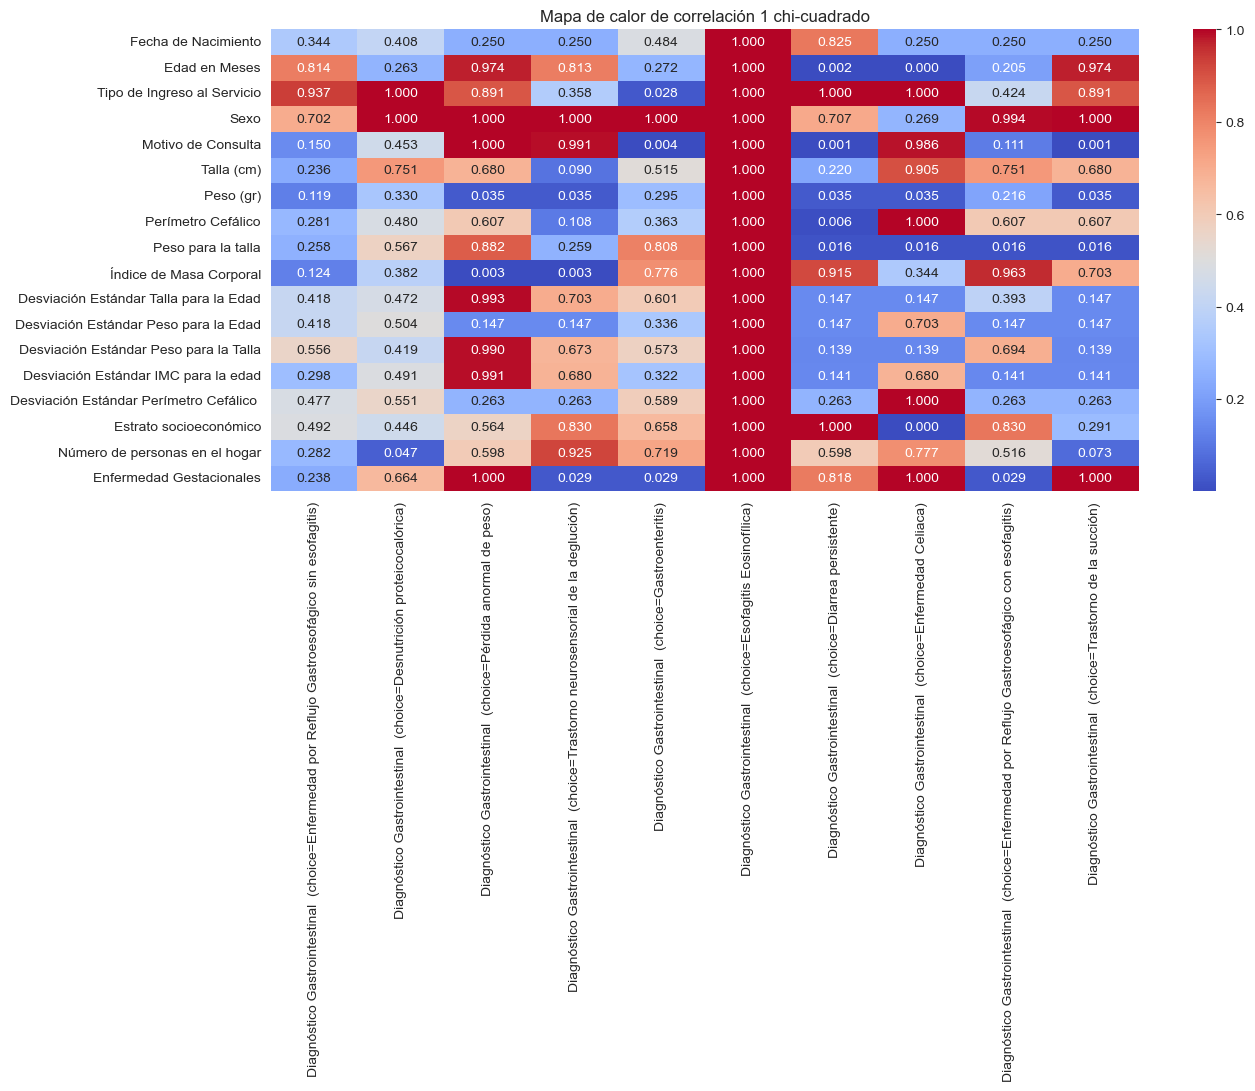

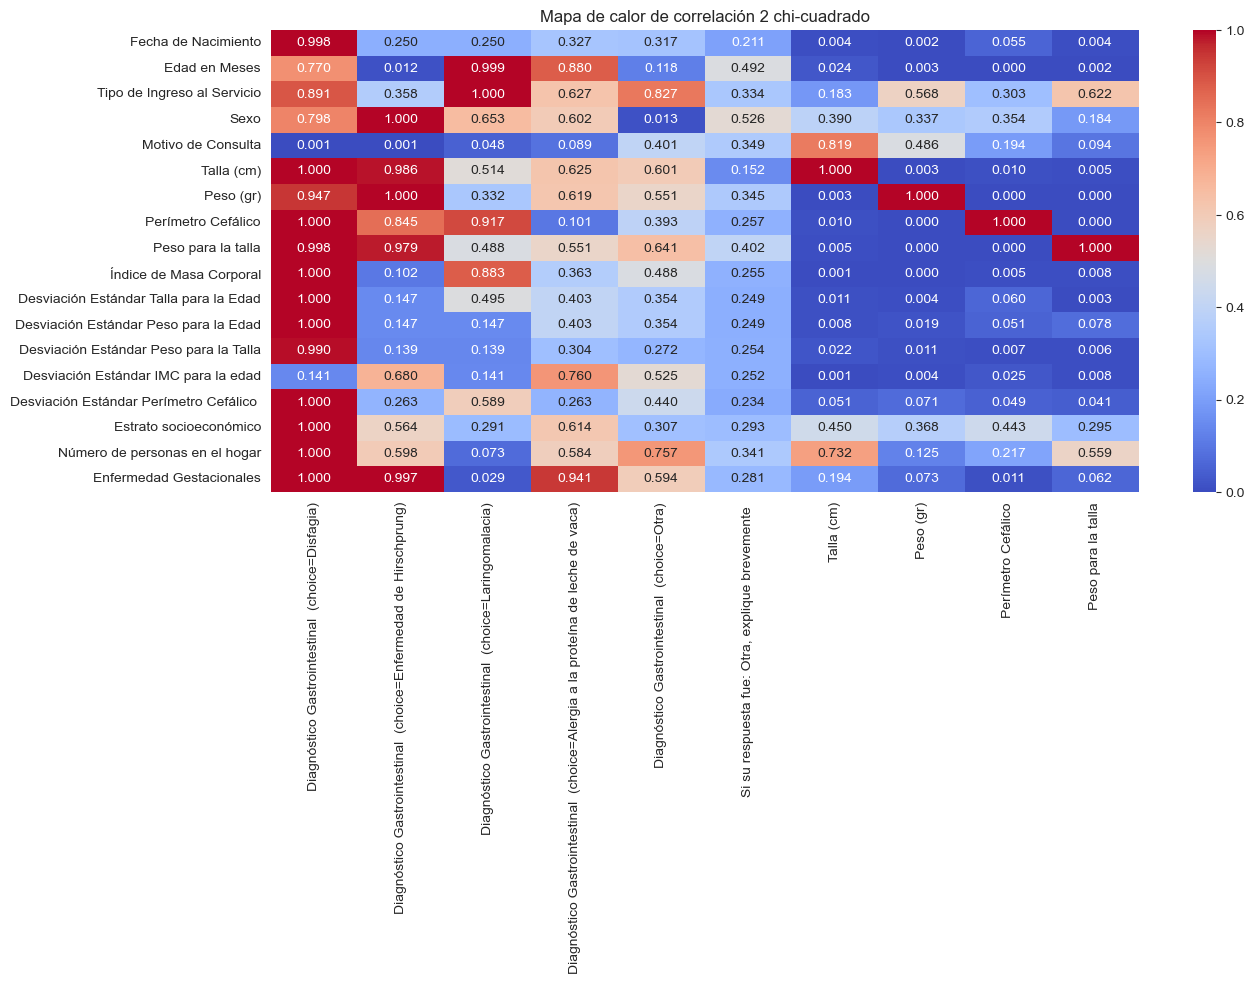

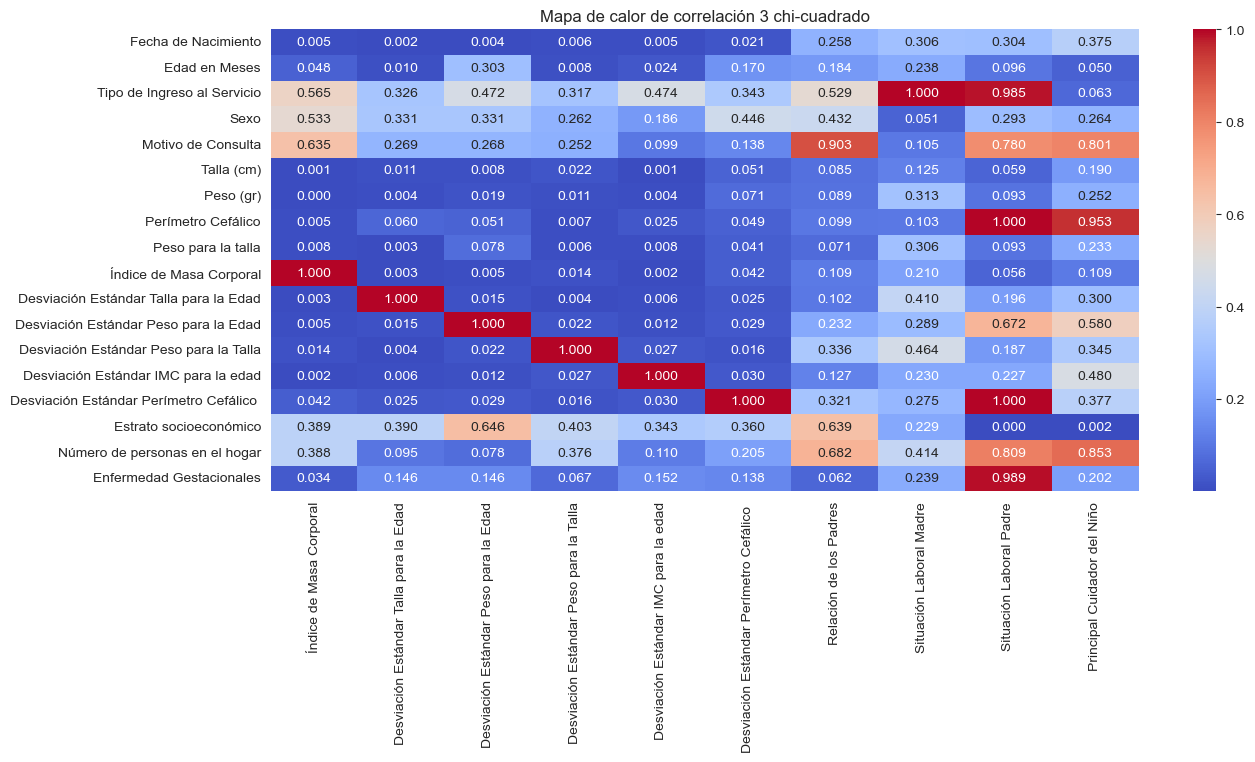

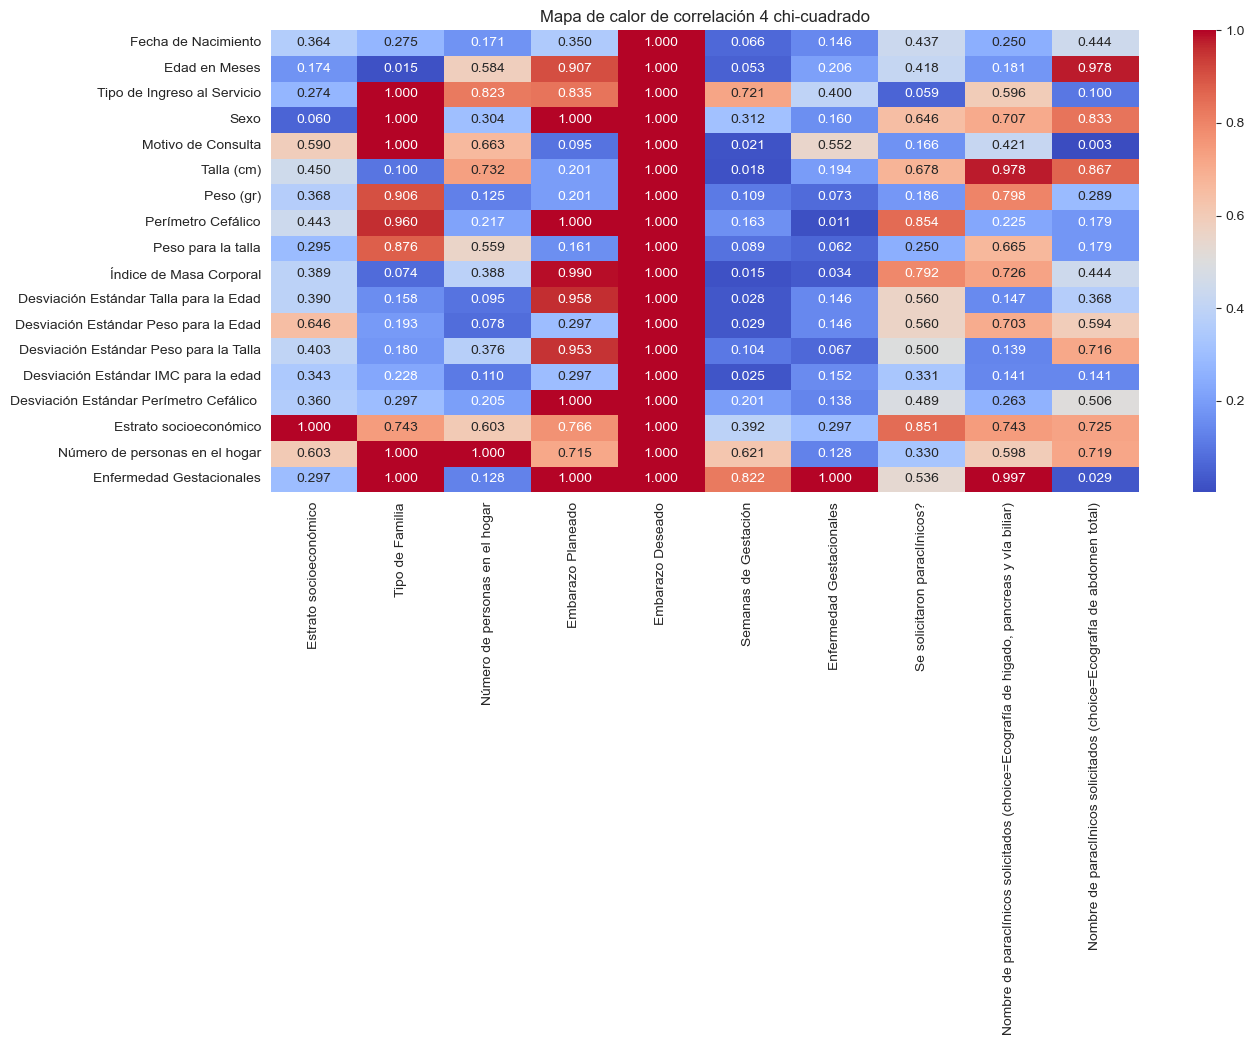

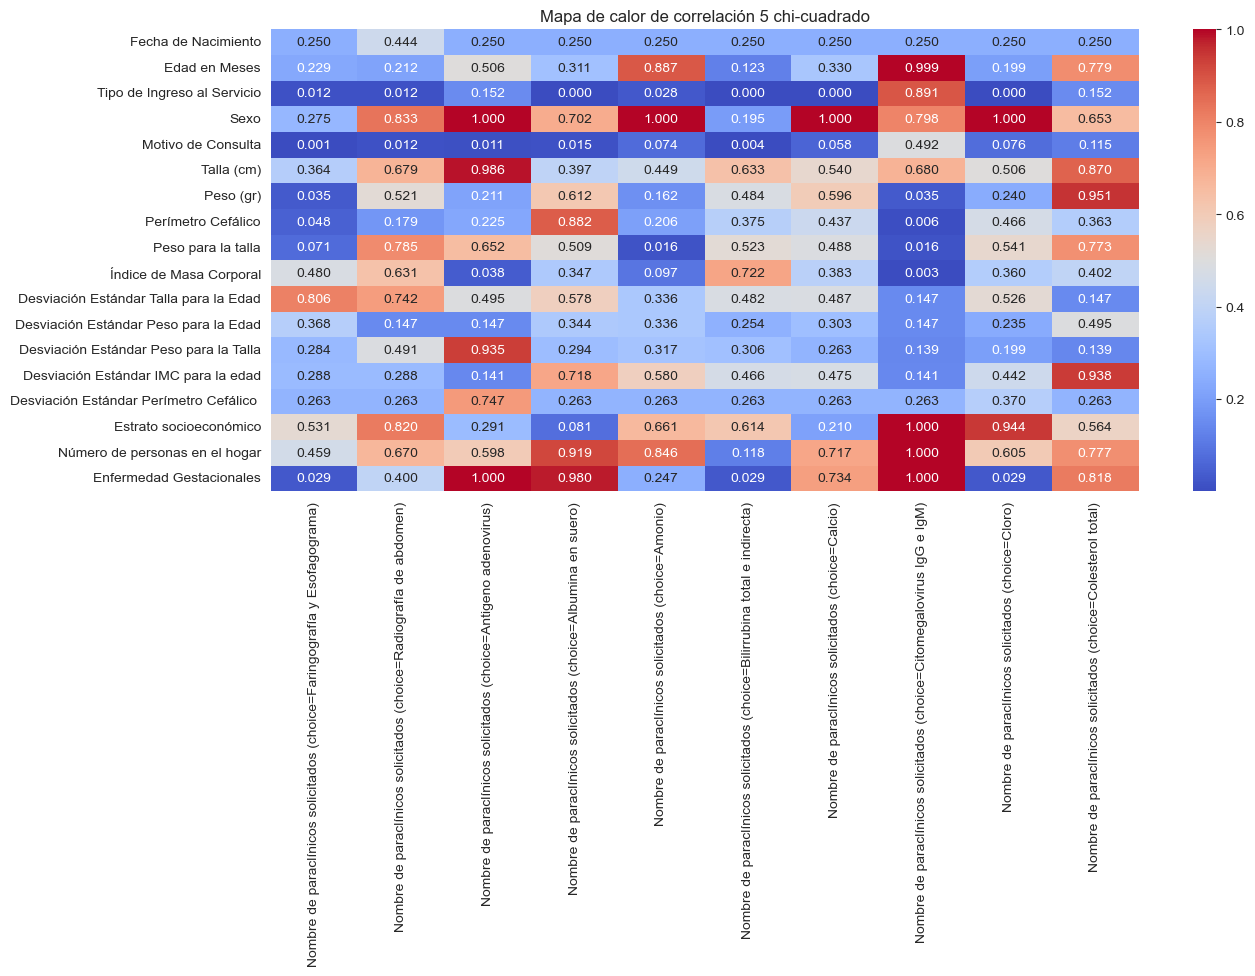

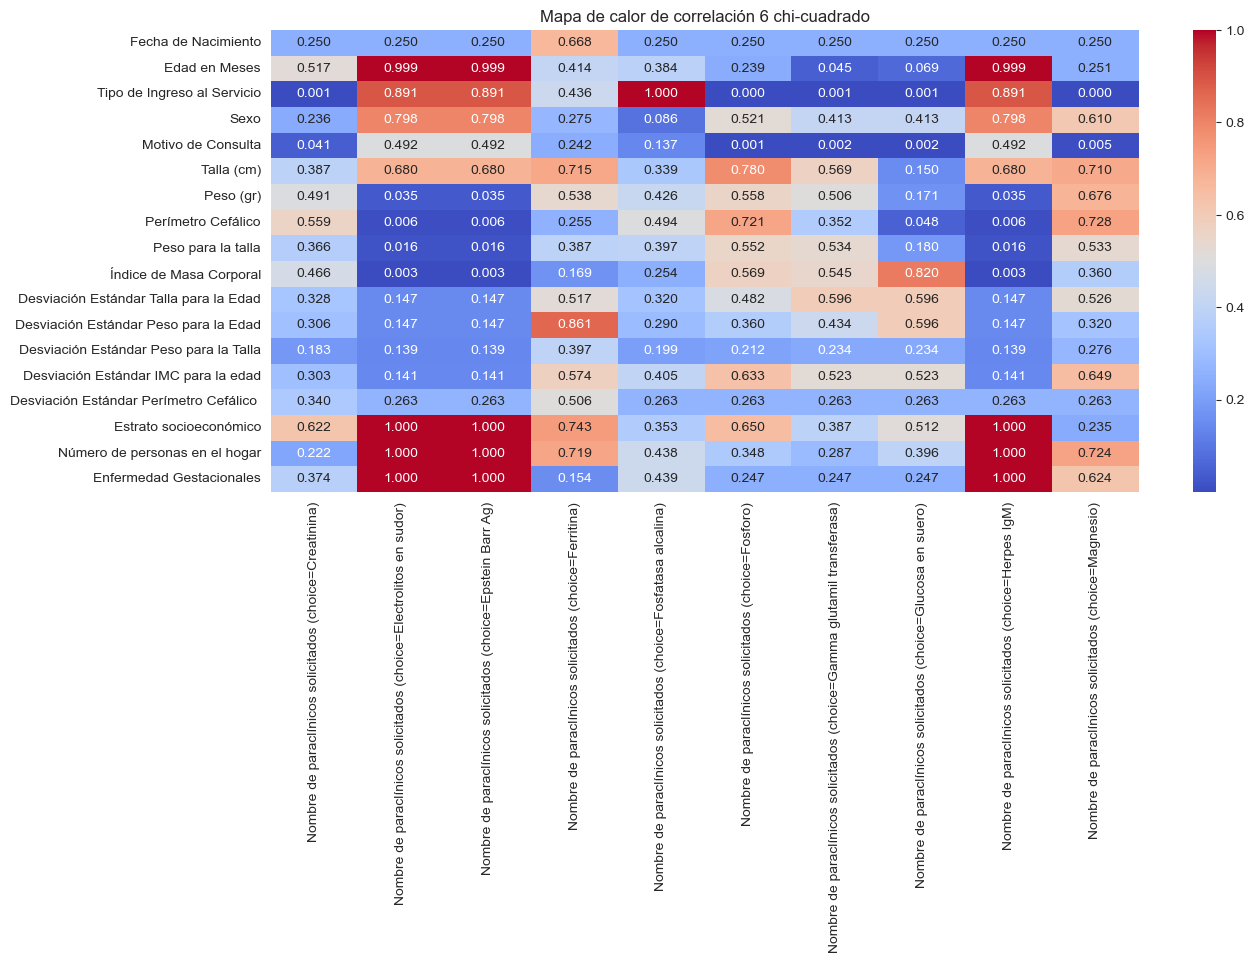

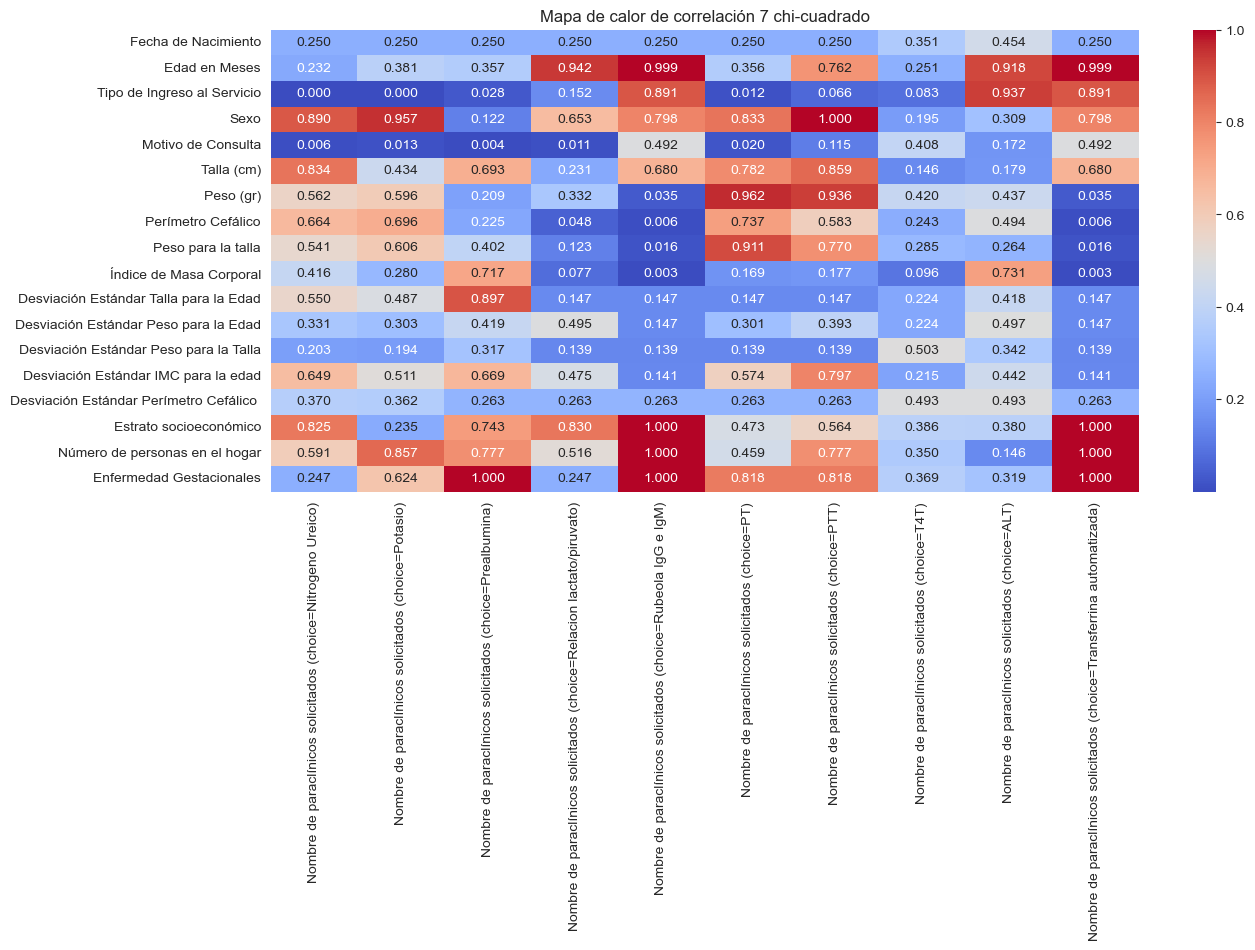

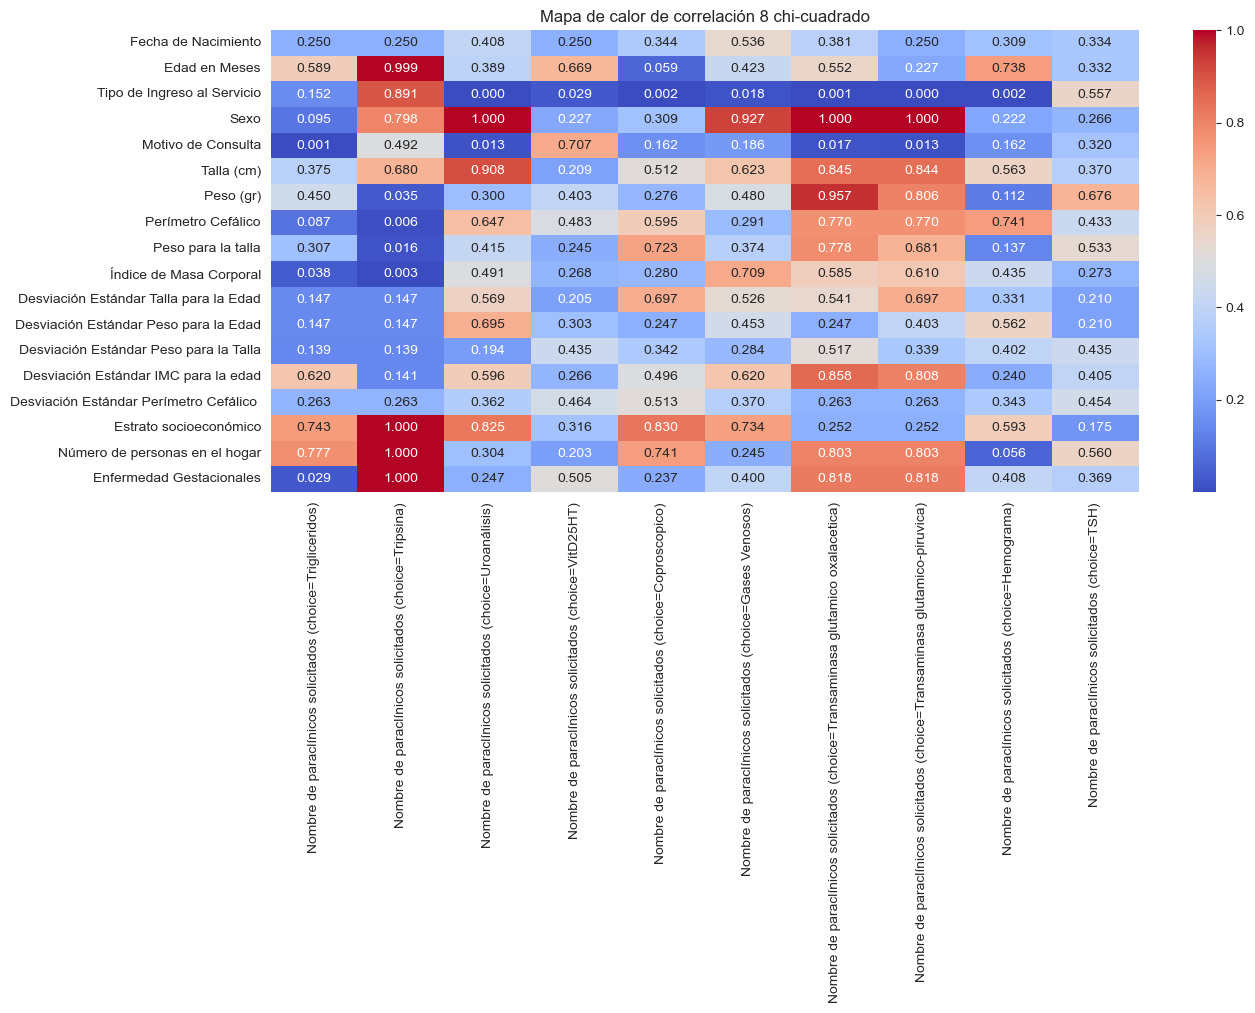

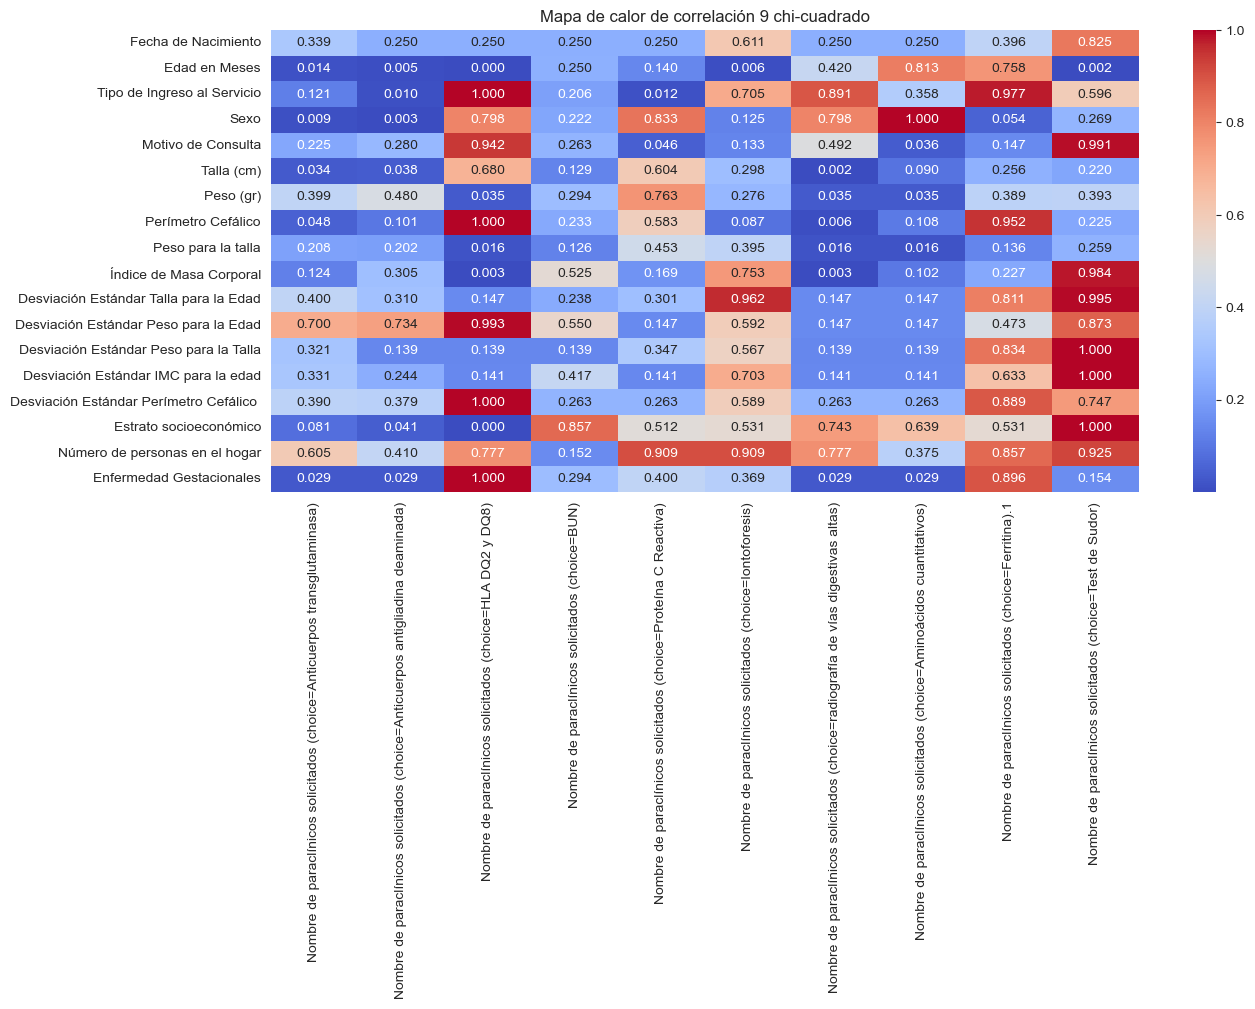

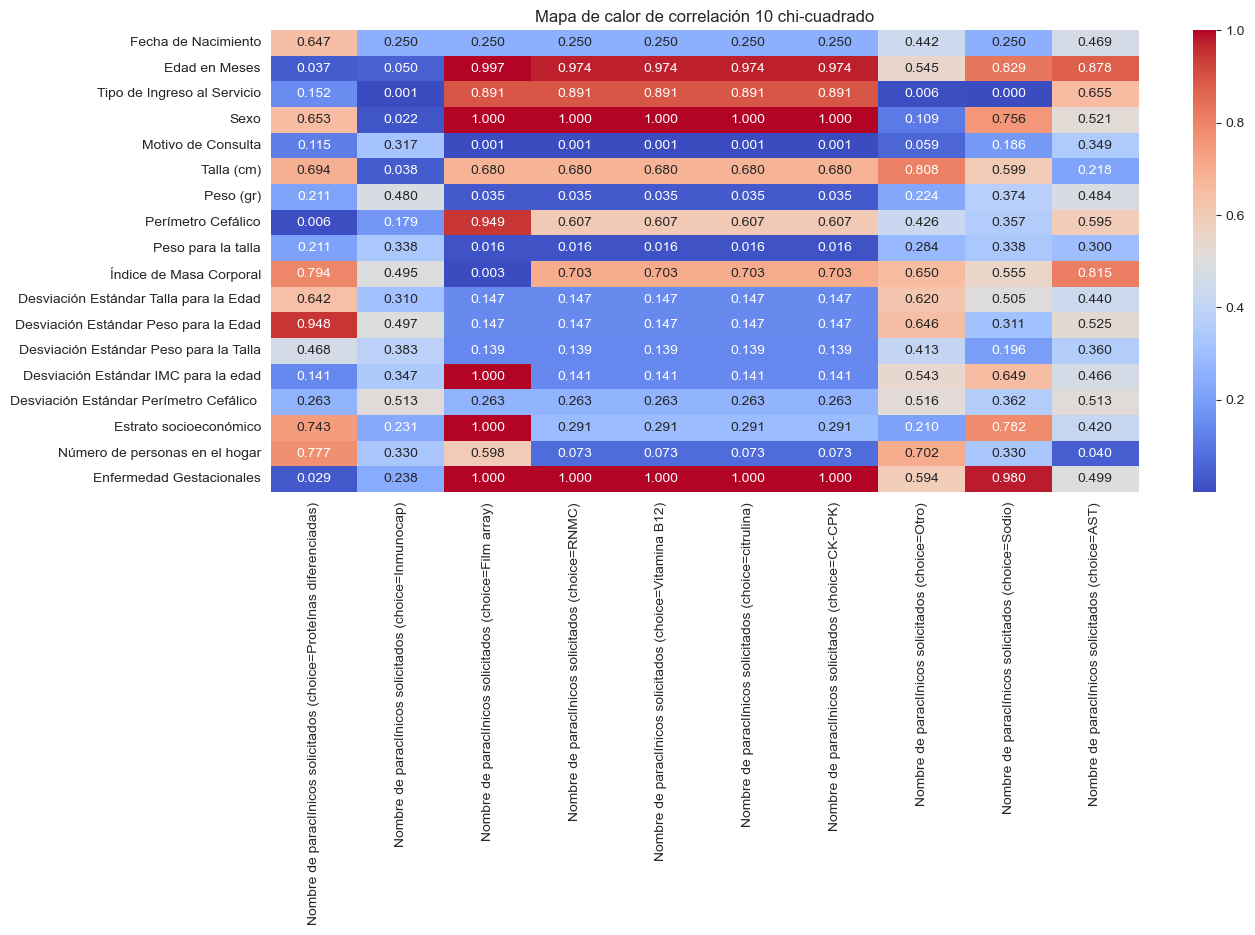

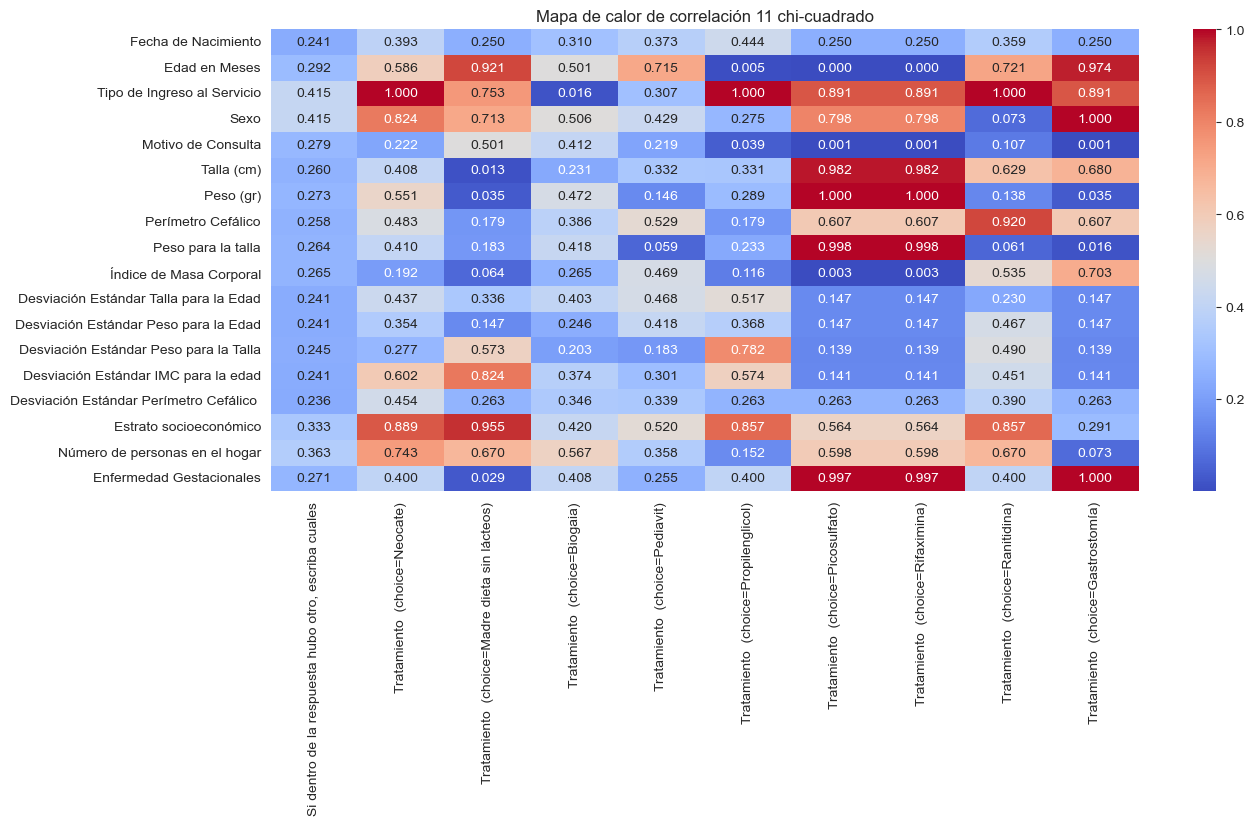

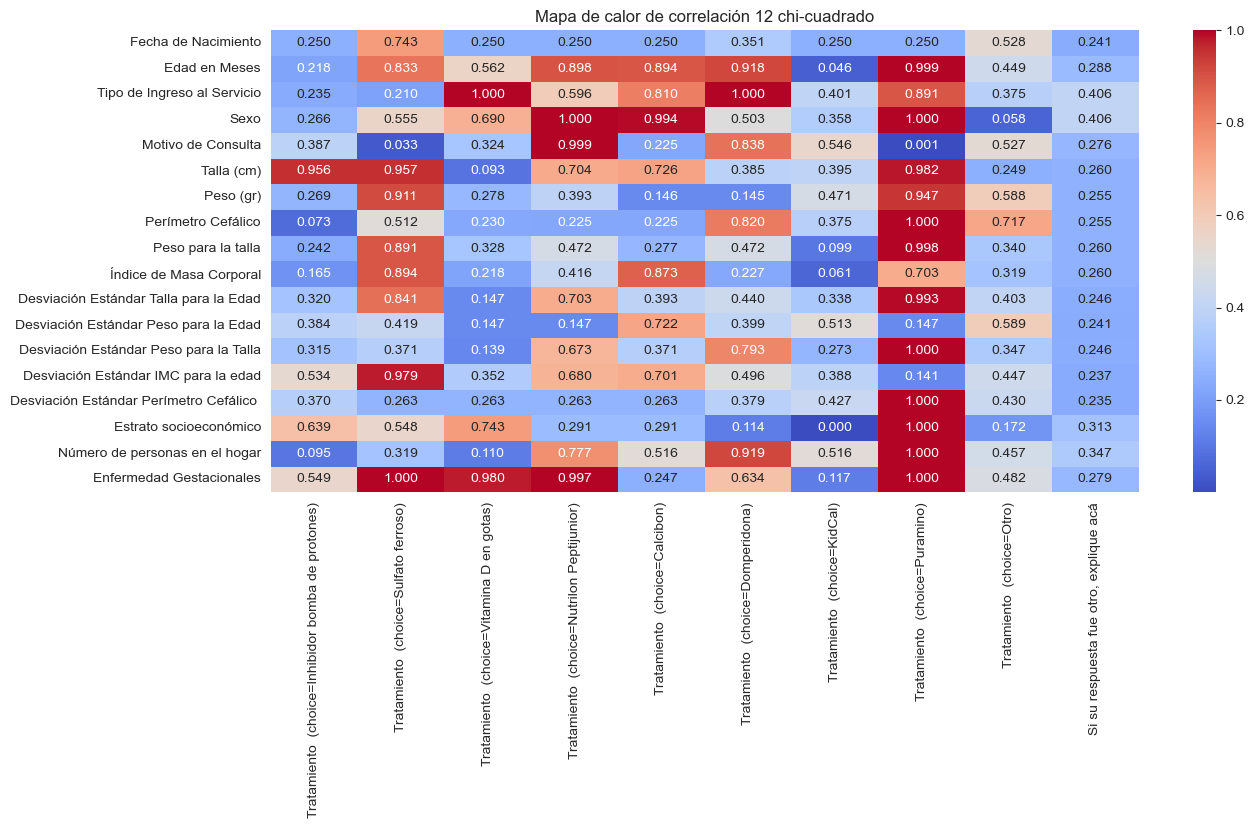

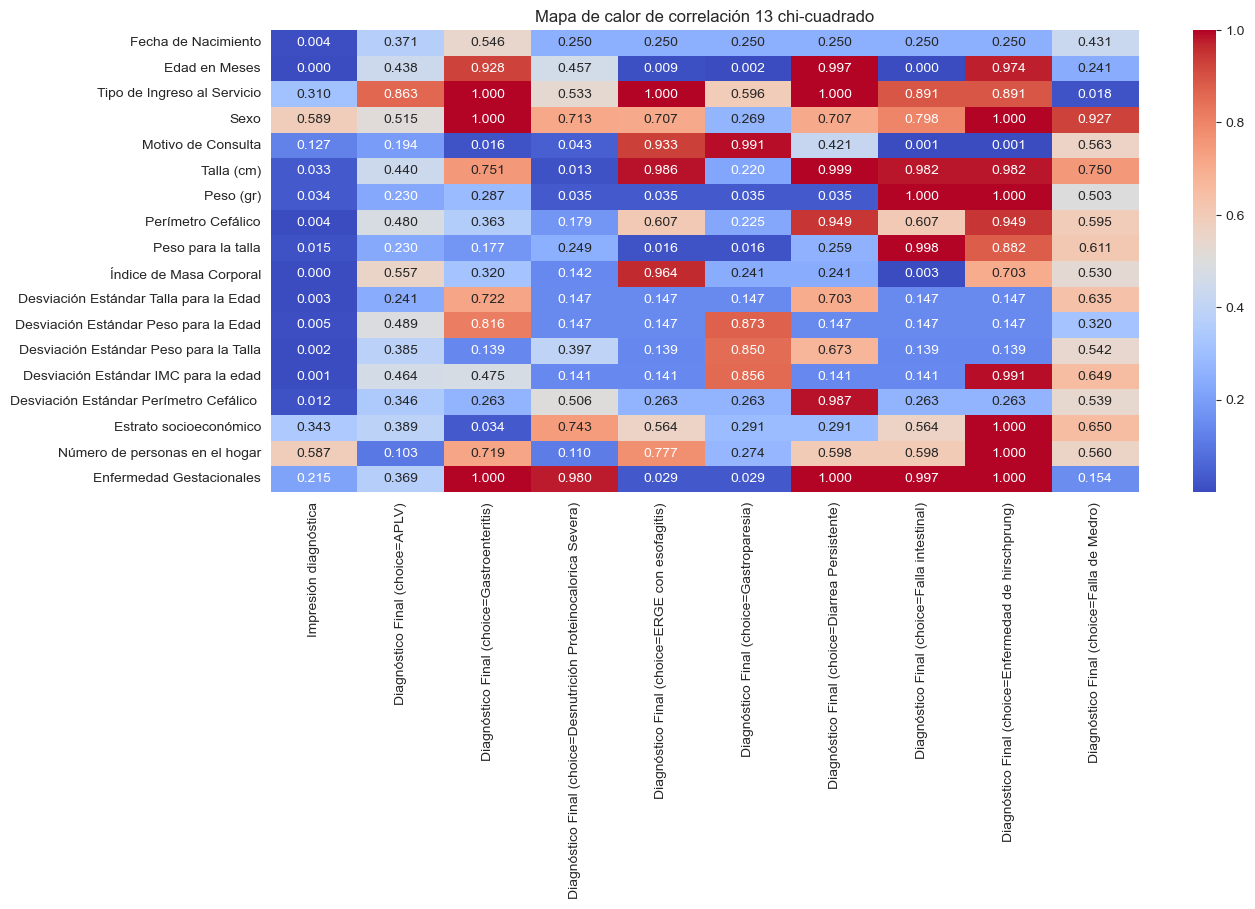

In [46]:
matriz_completa = pd.concat([p_values_matrix, chi2_matrix], ignore_index=True)

# Transponer matriz completa:
matriz_completa = matriz_completa.T

# Obtener el número total de columnas en el DataFrame
num_sub_df = 13
num_columnas_total = len(p_values_matrix.columns)

# Calcular el número de columnas en cada sub DataFrame
num_columnas_por_sub_df = num_columnas_total // num_sub_df

# Inicializar una lista para almacenar los sub DataFrames
sub_dfs = []

# Dividir el DataFrame en sub DataFrames
inicio = 0
for i in range(num_sub_df):
    fin = inicio + num_columnas_por_sub_df
    sub_df = p_values_matrix.iloc[:, inicio:fin]
    sub_dfs.append(sub_df)
    inicio = fin


# Generar mapas de calor:
for i in range(0, num_sub_df):
    plt.figure(figsize=(14, 6))
    sns.heatmap(sub_dfs[i], annot=True, cmap='coolwarm', fmt=".3f")
    plt.title('Mapa de calor de correlación '+str(i+1)+' chi-cuadrado')
    plt.show()

A partir del mapa de calor construido se analizará el valor p para cada una de las variables construidas:


1. Valor p menor que el nivel de significancia (0.05):

- Interpretación: Se rechaza la hipótesis nula.

- Significado: Hay evidencia significativa para decir que existe una correlación significativa entre las variables categoricas en estudio.

2. Valor p mayor que el nivel de significancia (0.05):

- Interpretación: No se rechaza la hipótesis nula.

- Significado: No hay evidencia significativa para decir que existe una correlación significativa entre las variables categoricas en estudio.

In [47]:
p_values_matrix

Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico sin esofagitis)  \
Fecha de Nacimiento                                                               0.344337                                              
Edad en Meses                                                                     0.814412                                              
Tipo de Ingreso al Servicio                                                       0.936950                                              
Sexo                                                                              0.702381                                              
Motivo de Consulta                                                                0.149678                                              
Talla (cm)                                                                        0.235606                                              
Peso (gr)                                                                         0.119039                                              
Perímetro Cefálico                                                                0.281170                                              
Peso para la talla                                                                0.257733                                              
Índice de Masa Corporal                                                           0.123855                                              
Desviación Estándar Talla para la Edad                                            0.418092                                              
Desviación Estándar Peso para la Edad                                             0.418092                                              
Desviación Estándar Peso para la Talla                                            0.556458                                              
Desviación Estándar IMC para la edad                                              0.297869                                              
Desviación Estándar Perímetro Cefálico                                            0.477081                                              
Estrato socioeconómico                                                            0.492096                                              
Número de personas en el hogar                                                    0.281545                                              
Enfermedad Gestacionales                                                          0.238353                                              

                                         Diagnóstico Gastrointestinal  (choice=Desnutrición proteicocalórica)  \
Fecha de Nacimiento                                                               0.407754                      
Edad en Meses                                                                     0.262935                      
Tipo de Ingreso al Servicio                                                       1.000000                      
Sexo                                                                              1.000000                      
Motivo de Consulta                                                                0.452505                      
Talla (cm)                                                                        0.750702                      
Peso (gr)                                                                         0.329563                      
Perímetro Cefálico                                                                0.479677                      
Peso para la talla                                                                0.566989                      
Índice de Masa Corporal                                                           0.382164                      
Desviación Estándar Talla para la Edad                                            0.471742                      
Desviación Estándar Peso para la Edad                                            

Construyendo la siguiente tabla se ilutra ilustra si el valor es menor al nivel de significancia o no:

In [117]:
p_values_matrix_sig = p_values_matrix.applymap(lambda x: x < nivel_de_significancia)
p_values_matrix_sig

Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico sin esofagitis)  \
Fecha de Nacimiento                                                                  False                                              
Edad en Meses                                                                        False                                              
Tipo de Ingreso al Servicio                                                          False                                              
Sexo                                                                                 False                                              
Motivo de Consulta                                                                   False                                              
Talla (cm)                                                                           False                                              
Peso (gr)                                                                            False                                              
Perímetro Cefálico                                                                   False                                              
Peso para la talla                                                                   False                                              
Índice de Masa Corporal                                                              False                                              
Desviación Estándar Talla para la Edad                                               False                                              
Desviación Estándar Peso para la Edad                                                False                                              
Desviación Estándar Peso para la Talla                                               False                                              
Desviación Estándar IMC para la edad                                                 False                                              
Desviación Estándar Perímetro Cefálico                                               False                                              
Estrato socioeconómico                                                               False                                              
Número de personas en el hogar                                                       False                                              
Enfermedad Gestacionales                                                             False                                              

                                         Diagnóstico Gastrointestinal  (choice=Desnutrición proteicocalórica)  \
Fecha de Nacimiento                                                                  False                      
Edad en Meses                                                                        False                      
Tipo de Ingreso al Servicio                                                          False                      
Sexo                                                                                 False                      
Motivo de Consulta                                                                   False                      
Talla (cm)                                                                           False                      
Peso (gr)                                                                            False                      
Perímetro Cefálico                                                                   False                      
Peso para la talla                                                                   False                      
Índice de Masa Corporal                                                              False                      
Desviación Estándar Talla para la Edad                                               False                      
Desviación Estándar Peso para la Edad                                            

Ahora se muestran las preguntas filtradas por significancia (valor p menor a 5%) y ordenas por el valor de chi2:

In [123]:
# Extraer los números del segundo DataFrame donde el primer DataFrame sea True
numeros_seleccionados = chi2_matrix.where(p_values_matrix_sig)
numeros_seleccionados

Diagnóstico Gastrointestinal  (choice=Enfermedad por Reflujo Gastroesofágico sin esofagitis)  \
Fecha de Nacimiento                                                                    NaN                                             
Edad en Meses                                                                          NaN                                             
Tipo de Ingreso al Servicio                                                            NaN                                             
Sexo                                                                                   NaN                                             
Motivo de Consulta                                                                     NaN                                             
Talla (cm)                                                                             NaN                                             
Peso (gr)                                                                              NaN                                             
Perímetro Cefálico                                                                     NaN                                             
Peso para la talla                                                                     NaN                                             
Índice de Masa Corporal                                                                NaN                                             
Desviación Estándar Talla para la Edad                                                 NaN                                             
Desviación Estándar Peso para la Edad                                                  NaN                                             
Desviación Estándar Peso para la Talla                                                 NaN                                             
Desviación Estándar IMC para la edad                                                   NaN                                             
Desviación Estándar Perímetro Cefálico                                                 NaN                                             
Estrato socioeconómico                                                                 NaN                                             
Número de personas en el hogar                                                         NaN                                             
Enfermedad Gestacionales                                                               NaN                                             

                                        Diagnóstico Gastrointestinal  (choice=Desnutrición proteicocalórica)  \
Fecha de Nacimiento                                                                    NaN                     
Edad en Meses                                                                          NaN                     
Tipo de Ingreso al Servicio                                                            NaN                     
Sexo                                                                                   NaN                     
Motivo de Consulta                                                                     NaN                     
Talla (cm)                                                                             NaN                     
Peso (gr)                                                                              NaN                     
Perímetro Cefálico                                                                     NaN                     
Peso para la talla                                                                     NaN                     
Índice de Masa Corporal                                                                NaN                     
Desviación Estándar Talla para la Edad                                                 NaN                     
Desviación Estándar Peso para la Edad                                                  NaN                     

Ahora se ordenan los resultados y se destacan los primeros 5 resultados con significancia y con mayor valor de chi2 son:

In [132]:
numeros_seleccionados = numeros_seleccionados.fillna(0)

# Convertir el DataFrame en una Serie y ordenar los valores de forma descendente
top_values = numeros_seleccionados.stack().sort_values(ascending=False)

top_values

Fecha de Nacimiento                     Desviación Estándar Talla para la Edad                                   3536.500000
                                        Desviación Estándar Peso para la Edad                                    3520.000000
Desviación Estándar Peso para la Edad   Desviación Estándar Talla para la Edad                                   3197.333333
Desviación Estándar Talla para la Edad  Desviación Estándar Peso para la Edad                                    3197.333333
Fecha de Nacimiento                     Desviación Estándar IMC para la edad                                     3165.750000
                                                                                                                    ...     
Peso (gr)                               Nombre de paraclínicos solicitados (choice=PT)                              0.000000
                                        Nombre de paraclínicos solicitados (choice=Relacion lactato/piruvato)       0.000000


Se obtienen las primeras 250 par de variables con mayores niveles de corelación medida por el valor de chi2 y que tienen significacia (< 0.05):

In [138]:
# Seleccionar los 5 valores más grandes
top_5_values = top_values.head(250)

# Obtener las filas y columnas correspondientes de los valores seleccionados
top_5_index = top_5_values.index
top_5_rows = [index[0] for index in top_5_index]
top_5_columns = [index[1] for index in top_5_index]

data_final = np.zeros((len(top_5_rows), len(top_5_columns)))
# Mostrar los valores, filas y columnas
for value, row, column in zip(top_5_values, top_5_rows, top_5_columns):
    print(f"Valor: {value}, Fila: {row}, Columna: {column}")

Valor: 3536.5, Fila: Fecha de Nacimiento, Columna: Desviación Estándar Talla para la Edad
Valor: 3520.0000000000005, Fila: Fecha de Nacimiento, Columna: Desviación Estándar Peso para la Edad
Valor: 3197.333333333334, Fila: Desviación Estándar Peso para la Edad, Columna: Desviación Estándar Talla para la Edad
Valor: 3197.3333333333335, Fila: Desviación Estándar Talla para la Edad, Columna: Desviación Estándar Peso para la Edad
Valor: 3165.750000000001, Fila: Fecha de Nacimiento, Columna: Desviación Estándar IMC para la edad
Valor: 3100.0000000000005, Fila: Fecha de Nacimiento, Columna: Desviación Estándar Peso para la Talla
Valor: 3036.0000000000005, Fila: Fecha de Nacimiento, Columna: Peso (gr)
Valor: 2945.250000000001, Fila: Desviación Estándar IMC para la edad, Columna: Desviación Estándar Talla para la Edad
Valor: 2945.250000000001, Fila: Desviación Estándar Talla para la Edad, Columna: Desviación Estándar IMC para la edad
Valor: 2905.388888888889, Fila: Desviación Estándar Talla pa

El top 5 de variables con significancia y con mayor valor de chi2 son:

1. **Fecha de Nacimiento y Desviación Estándar Talla para la Edad**
2. **Fecha de Nacimiento y Desviación Estándar Peso para la Edad**
3. **Desviación Estándar Peso para la Edad y Desviación Estándar Talla para la Edad**
4. **Desviación Estándar Talla para la Edad y Desviación Estándar Peso para la Edad**
5. **Fecha de Nacimiento y Desviación Estándar IMC para la edad**

# 3. Estadisticas Adicionales

Se analizan por cada diagnóstico final la distinción por sexo, masculino y femenino y si el diagnóstico final fue acertado o no:

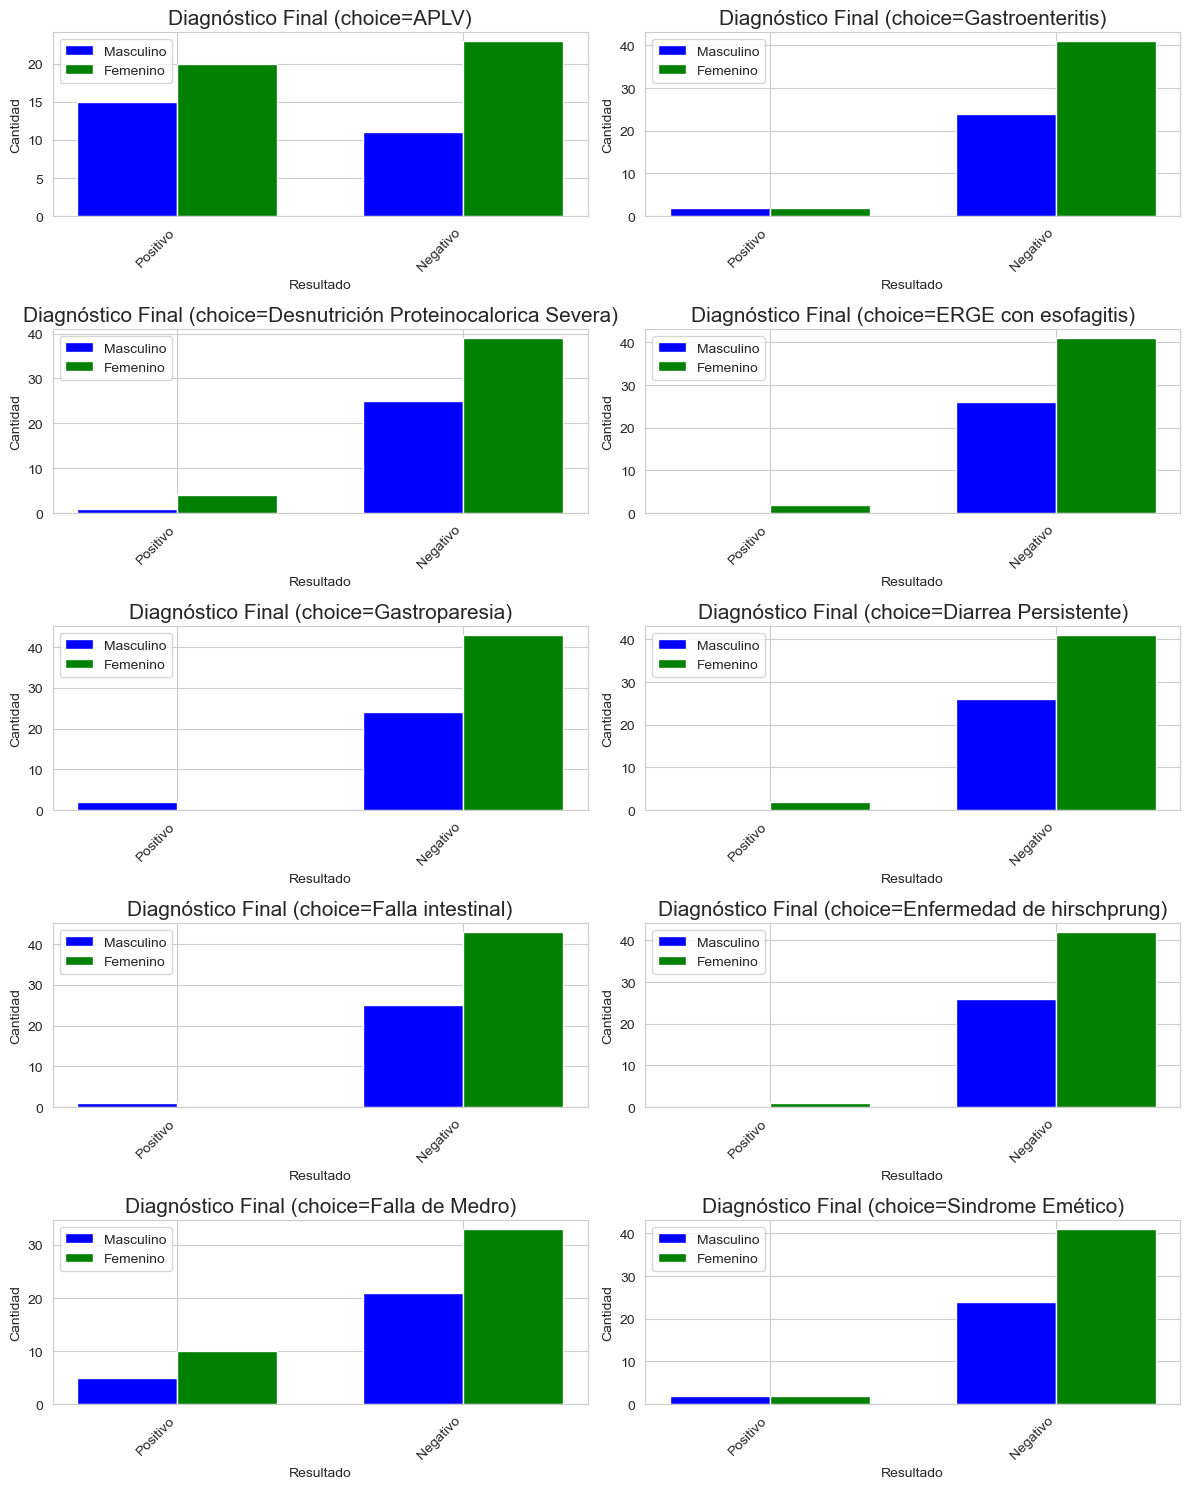

In [45]:
# Ancho de las barras
ancho_barra = 0.35

# Obtener todas las columnas que comienzan con "Diagnóstico Final"
columnas_diagnostico_final = [col for col in datos_estudio.columns if col.startswith('Diagnóstico Final')]
columnas_diagnostico_final.append('Sexo')

# Selección de las columnas de diagnóstico final
datos_diagnosticos = datos_estudio[columnas_diagnostico_final]

# Agrupar por sexo y calcular el total de diagnósticos positivos y negativos para cada diagnóstico:
resultados_diagnosticos_positivos = datos_diagnosticos.groupby('Sexo').agg(lambda x: (x == 1).sum())
resultados_diagnosticos_positivos.rename(index={resultados_diagnosticos_positivos.index[0]: 'Femenino'}, inplace=True)
resultados_diagnosticos_positivos.rename(index={resultados_diagnosticos_positivos.index[-1]: 'Masculino'}, inplace=True)

resultados_diagnosticos_negativos = datos_diagnosticos.groupby('Sexo').agg(lambda x: (x == 0).sum())
resultados_diagnosticos_negativos.rename(index={resultados_diagnosticos_negativos.index[0]: 'Femenino'}, inplace=True)
resultados_diagnosticos_negativos.rename(index={resultados_diagnosticos_negativos.index[-1]: 'Masculino'}, inplace=True)

# Hombres: 
resultados_hombres_diagnosticos_positivos = resultados_diagnosticos_positivos.tail(1)
resultados_hombres_diagnosticos_negativos = resultados_diagnosticos_negativos.tail(1)

# Mujeres:
resultados_mujeres_diagnosticos_positivos = resultados_diagnosticos_positivos.head(1)
resultados_mujeres_diagnosticos_negativos = resultados_diagnosticos_negativos.head(1)

# Array de diagnosticos:
diagnosticos = resultados_diagnosticos_positivos.columns.tolist()

# Crear subgráficos
fig, axs = plt.subplots(5, 2, figsize=(12, 15))

# Recorrer cada diagnóstico y generar un gráfico para cada uno
for i, (diagnostico, ax) in enumerate(zip(diagnosticos, axs.flatten())):
    # Calcular los índices para las categorías
    indices = np.arange(2)

    # Obtener resultados para el diagnóstico actual
    resultados_hombres = [resultados_hombres_diagnosticos_positivos.iloc[0].get(diagnostico) ,resultados_hombres_diagnosticos_negativos.iloc[0].get(diagnostico)]
    resultados_mujeres = [resultados_mujeres_diagnosticos_positivos.iloc[0].get(diagnostico), resultados_mujeres_diagnosticos_negativos.iloc[0].get(diagnostico)]

    # Trazar las barras agrupadas para hombres y mujeres
    ax.bar(indices - ancho_barra/2, resultados_hombres, width=ancho_barra, color='blue', label='Masculino')
    ax.bar(indices + ancho_barra/2, resultados_mujeres, width=ancho_barra, color='green', label='Femenino')

    # Configurar las etiquetas y el título
    ax.set_xlabel('Resultado')
    ax.set_ylabel('Cantidad')
    ax.set_title(diagnostico, fontsize=15, ha='center')
    ax.set_xticks(indices)
    ax.set_xticklabels(['Positivo', 'Negativo'])
    ax.legend()

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.setp(ax.get_xticklabels(), rotation=45, ha='right')

# Ajustar la distribución de los subgráficos y agregar espacio entre ellos
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Mostrar los gráficos
plt.tight_layout()
plt.show()

Se analiza por cada diagnóstico final la distinción por edad y si el diagnóstico fue acertado o no:

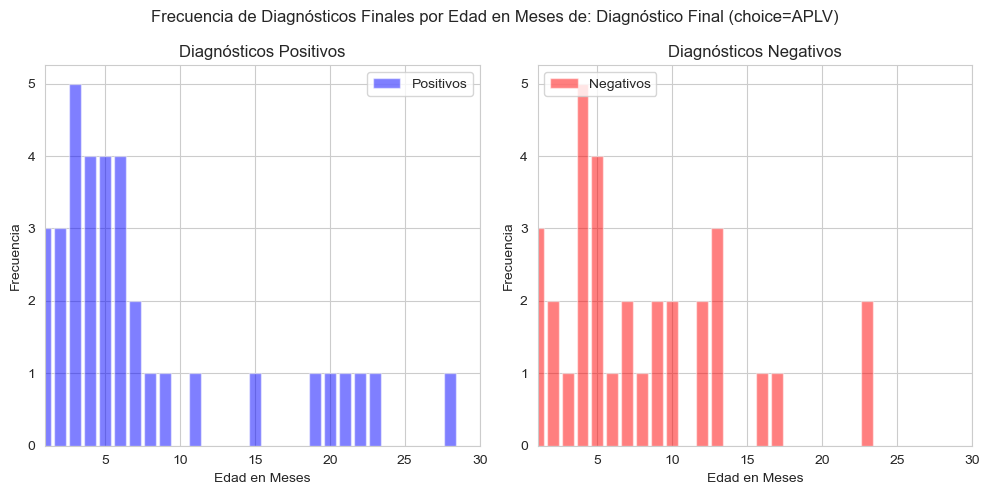

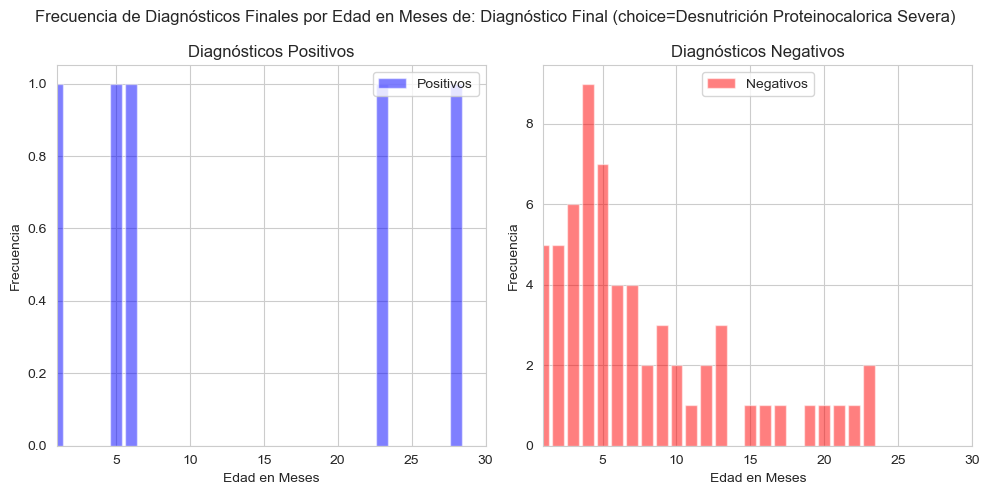

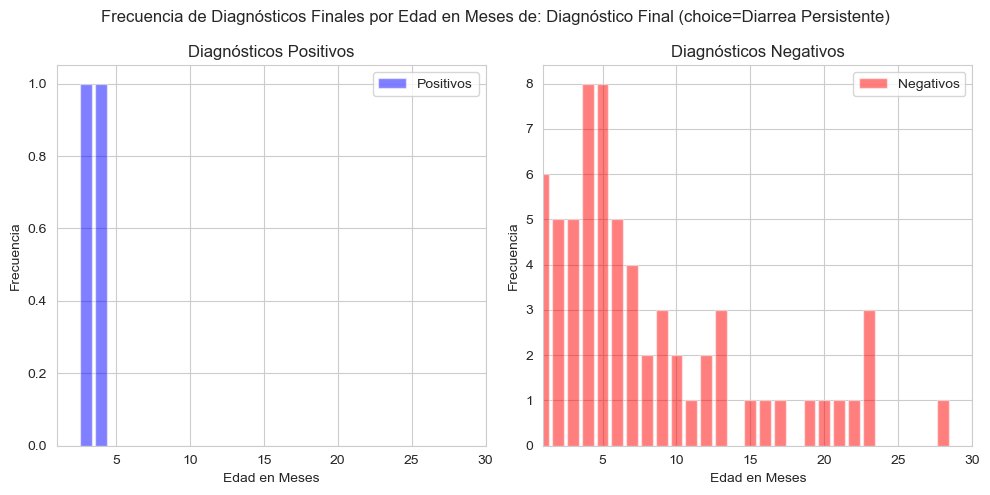

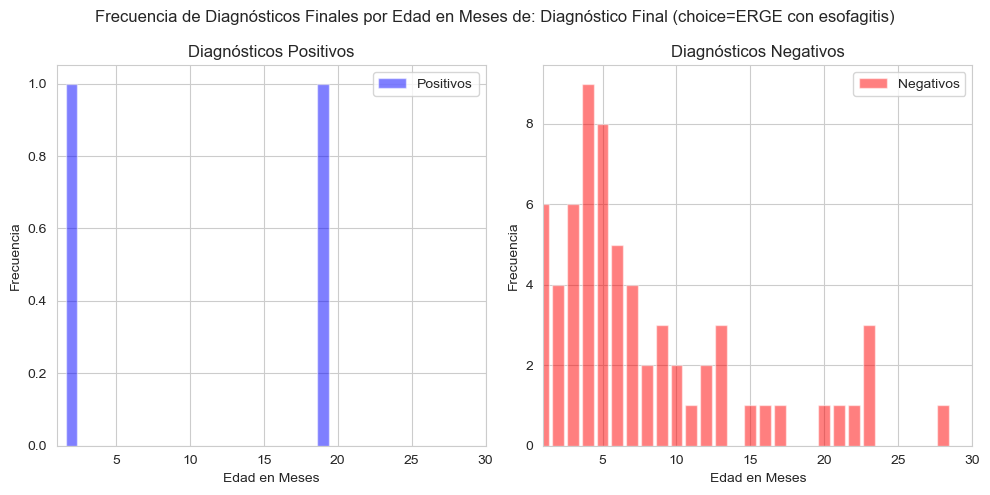

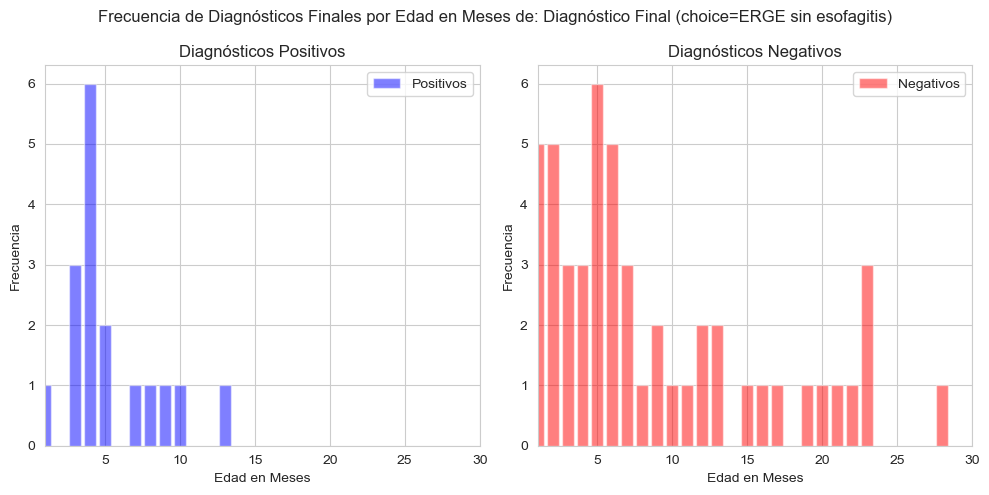

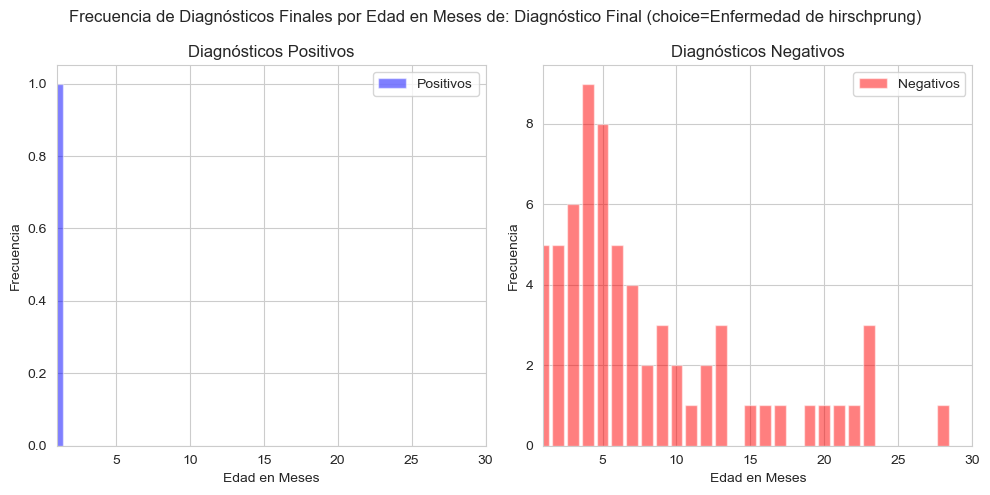

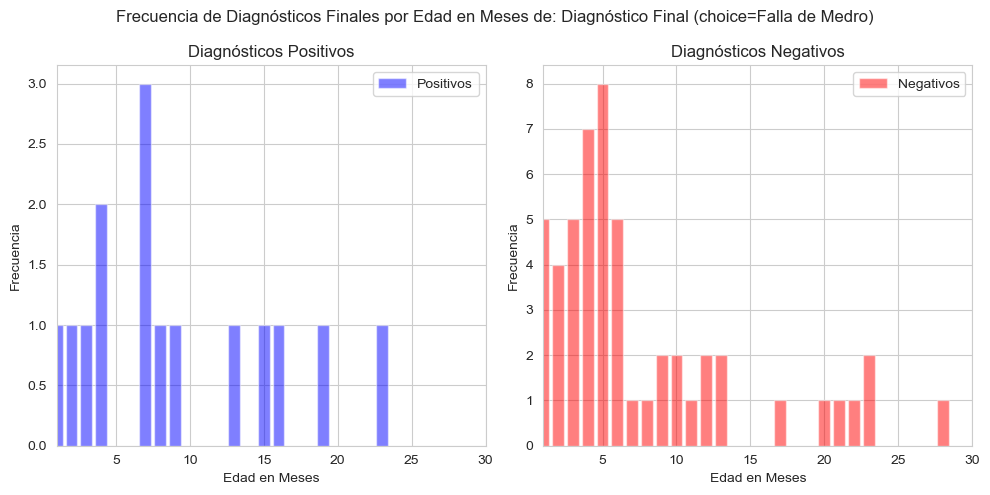

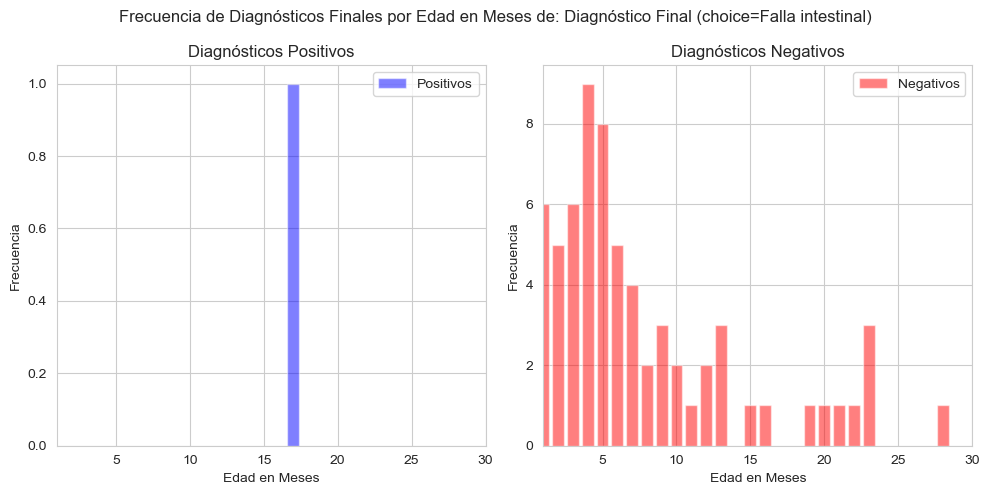

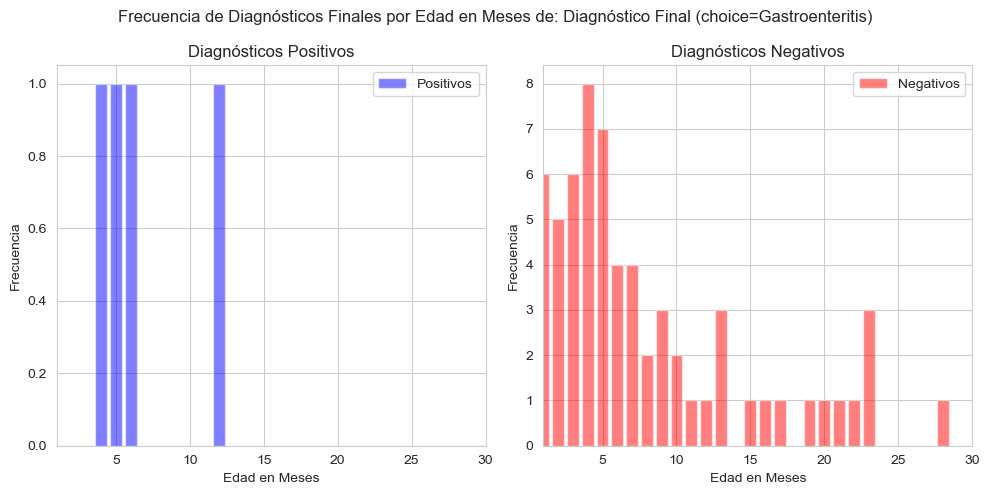

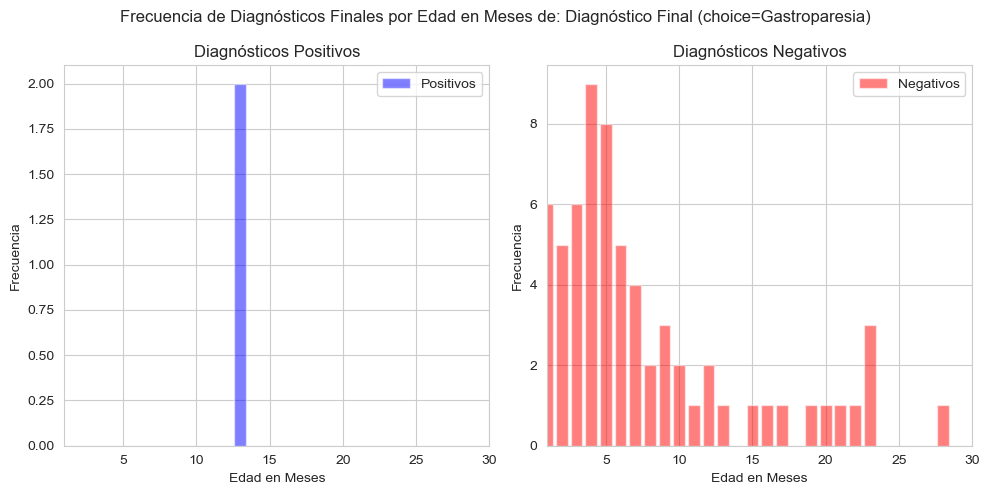

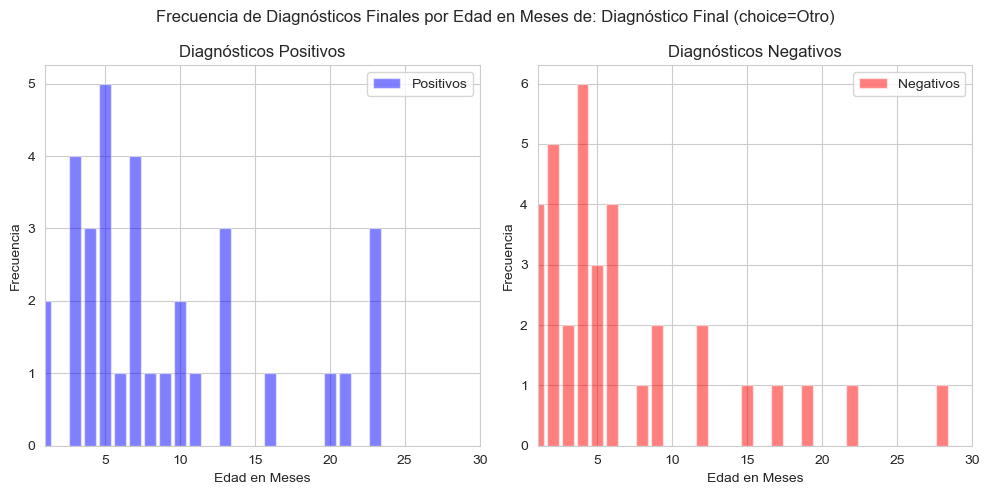

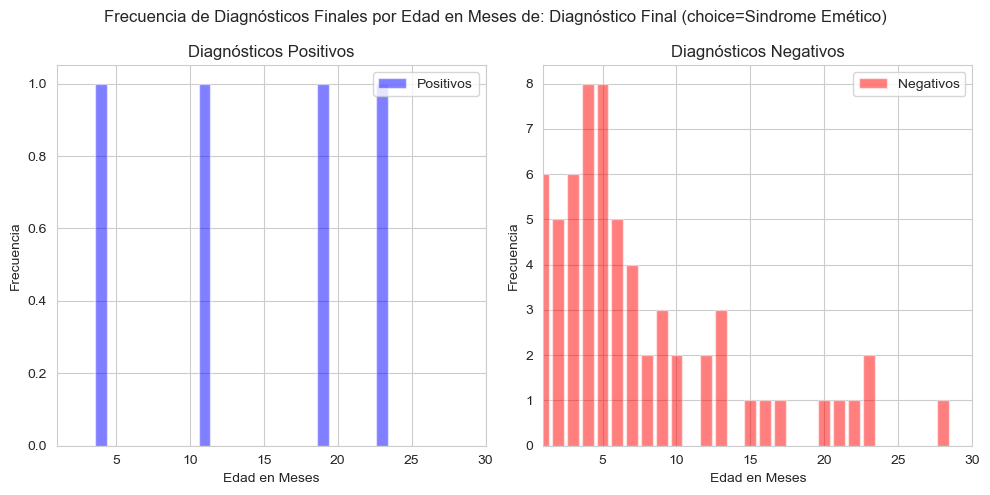

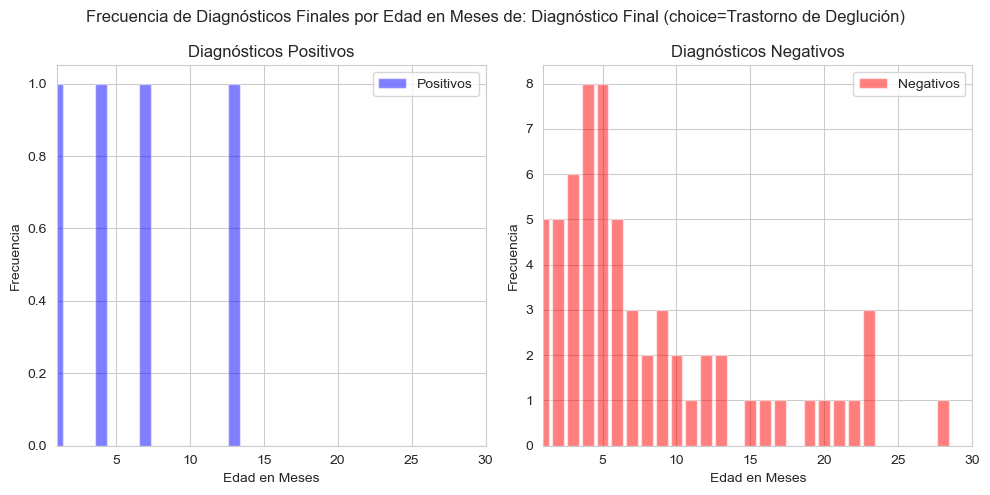

In [73]:
# Obtener todas las columnas que comienzan con "Diagnóstico Final"
columnas_edad_diagnostico = [col for col in datos_estudio.columns if col.startswith('Diagnóstico Final')]
columnas_edad_diagnostico.append('Edad en Meses')

# Selección de las columnas de diagnóstico final
datos_edad_diagnosticos = datos_estudio[columnas_edad_diagnostico]

# Convertir columnas de diagnóstico en filas
df_pivot_temp = datos_edad_diagnosticos.melt(id_vars='Edad en Meses', var_name='Diagnóstico', value_name='Estado')

# Filtrar solo las filas donde el diagnóstico es positivo (Estado == 1)
df_edad_positivos = df_pivot_temp[df_pivot_temp['Estado'] == 1]

# Filtrar solo las filas donde el diagnóstico es negativo (Estado == 0)
df_edad_negativos = df_pivot_temp[df_pivot_temp['Estado'] == 0]

# Eliminar la columna 'Estado', ya que todos los diagnósticos son positivos
df_edad_positivos = df_edad_positivos.drop(columns='Estado')

# Eliminar la columna 'Estado', ya que todos los diagnósticos son positivos
df_edad_negativos = df_edad_negativos.drop(columns='Estado')

# Agrupar los datos por edad y contar la frecuencia de diagnósticos
diagnosticos_por_edad_positivos = df_edad_positivos.groupby('Edad en Meses')['Diagnóstico'].value_counts().unstack().T
diagnosticos_por_edad_negativos = df_edad_negativos.groupby('Edad en Meses')['Diagnóstico'].value_counts().unstack().T

# Iteramos sobre las filas positivas y negativas simultáneamente
for fila_pos, fila_neg in zip(diagnosticos_por_edad_positivos.iterrows(), diagnosticos_por_edad_negativos.iterrows()):
    # Crear una nueva figura para cada par de filas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Graficar diagnósticos positivos
    ax1.bar(fila_pos[1].index, fila_pos[1].values, label='Positivos', color='blue', alpha=0.5)
    ax1.set_xlabel('Edad en Meses')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Diagnósticos Positivos')
    ax1.set_xlim(1, 30)
    ax1.legend()

    # Graficar diagnósticos negativos
    ax2.bar(fila_neg[1].index, fila_neg[1].values, label='Negativos', color='red', alpha=0.5)
    ax2.set_xlabel('Edad en Meses')
    ax2.set_ylabel('Frecuencia')
    ax2.set_title('Diagnósticos Negativos')
    ax2.set_xlim(1, 30)
    ax2.legend()

    # Establecer un título común para ambos subplots
    fig.suptitle(f'Frecuencia de Diagnósticos Finales por Edad en Meses de: {fila_neg[0]}')

    # Mostrar la figura
    plt.tight_layout()
    plt.show()
    

Se analiza por cada diagnóstico final la distinción por motivo de consulta y si el diagnóstico final fue acertado o no:

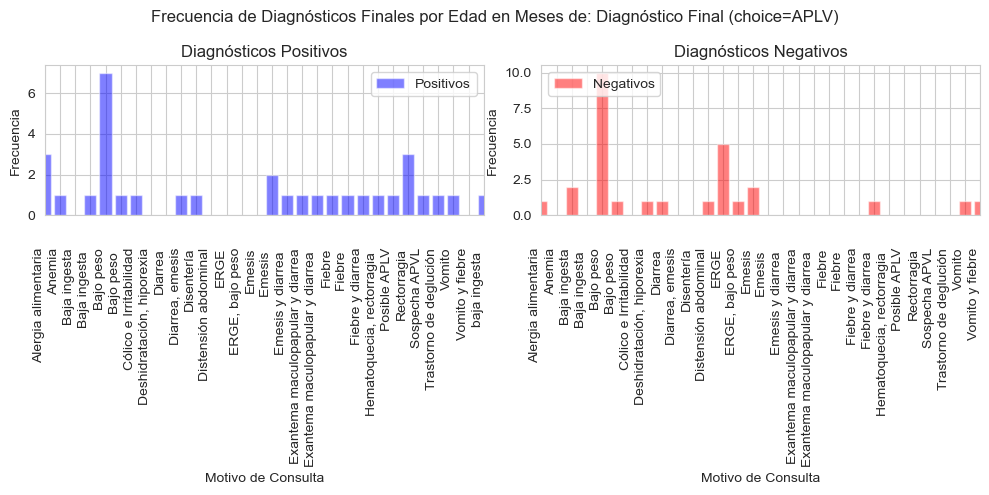

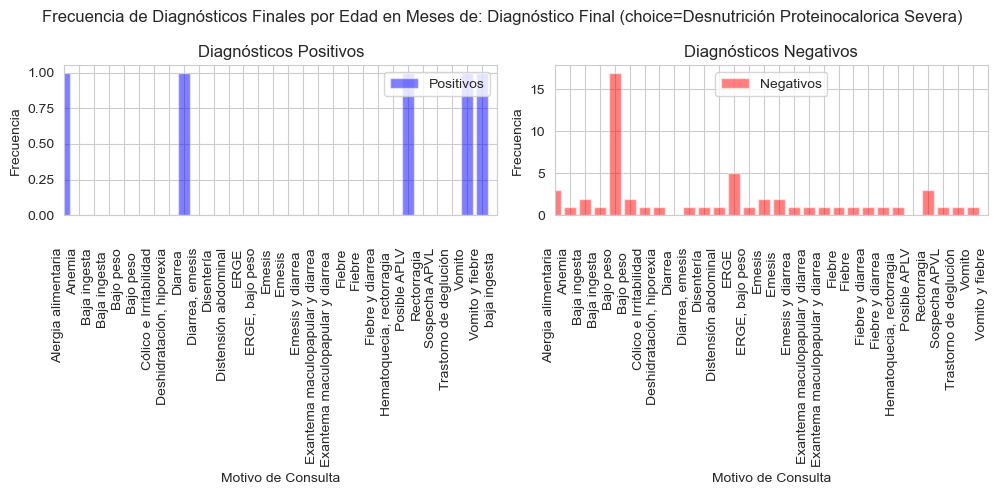

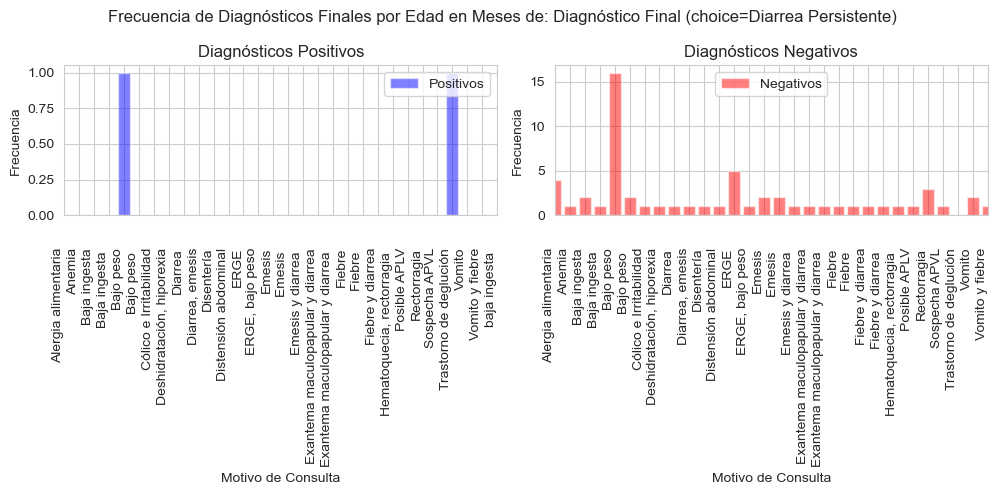

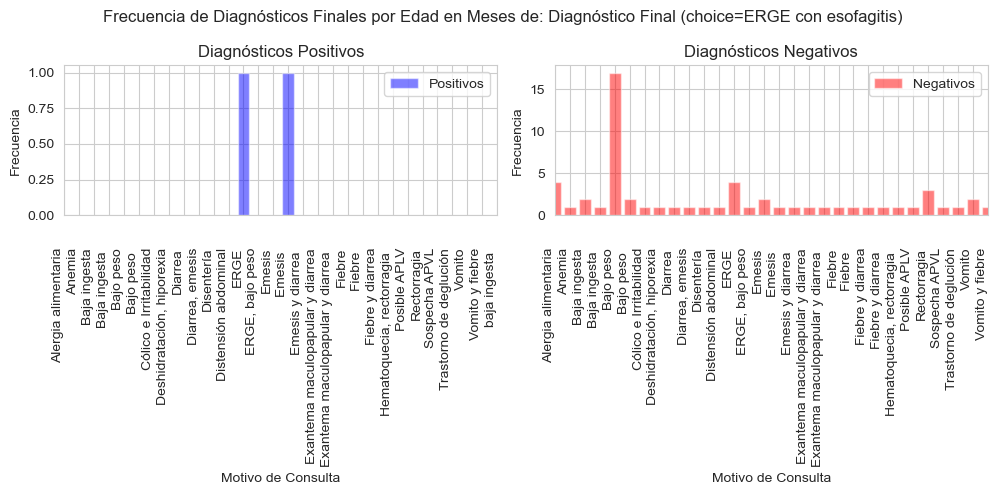

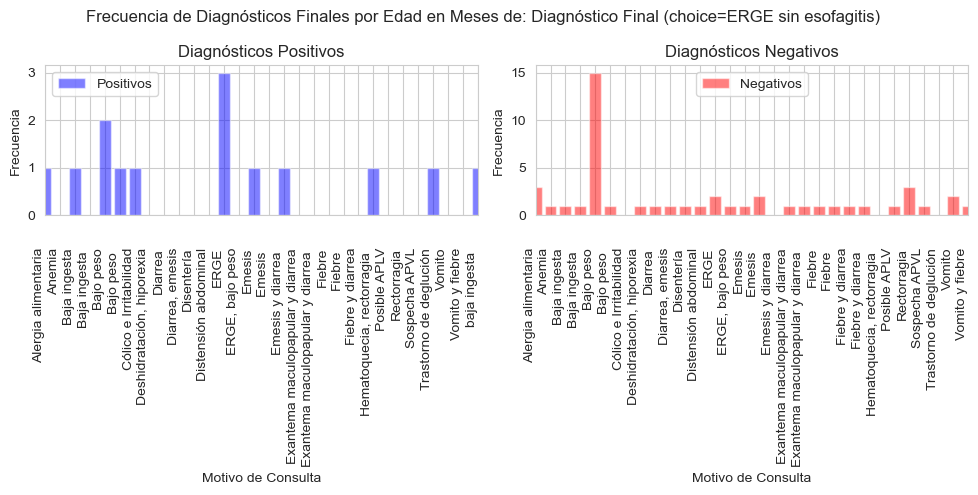

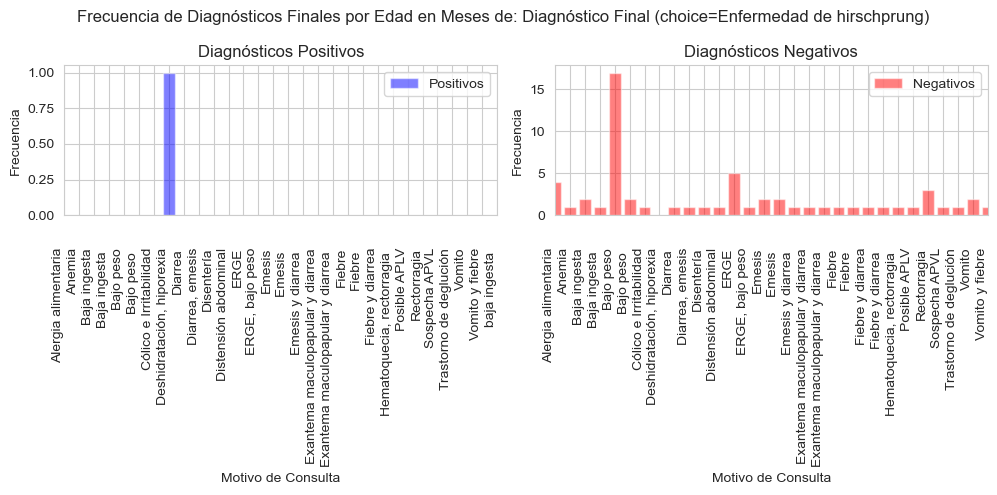

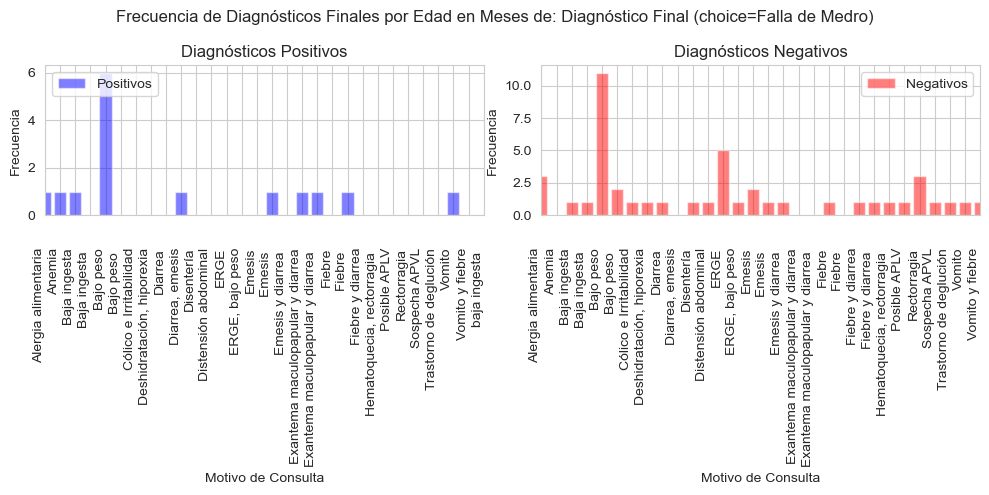

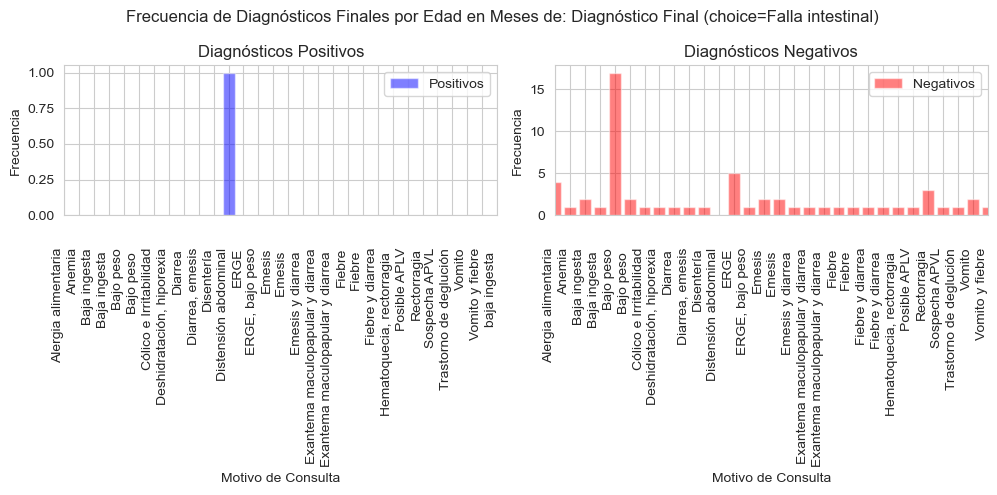

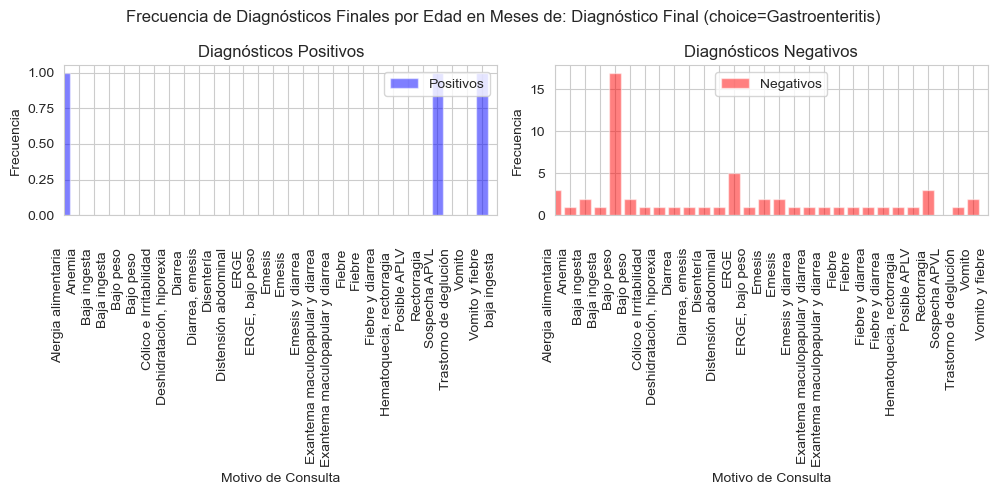

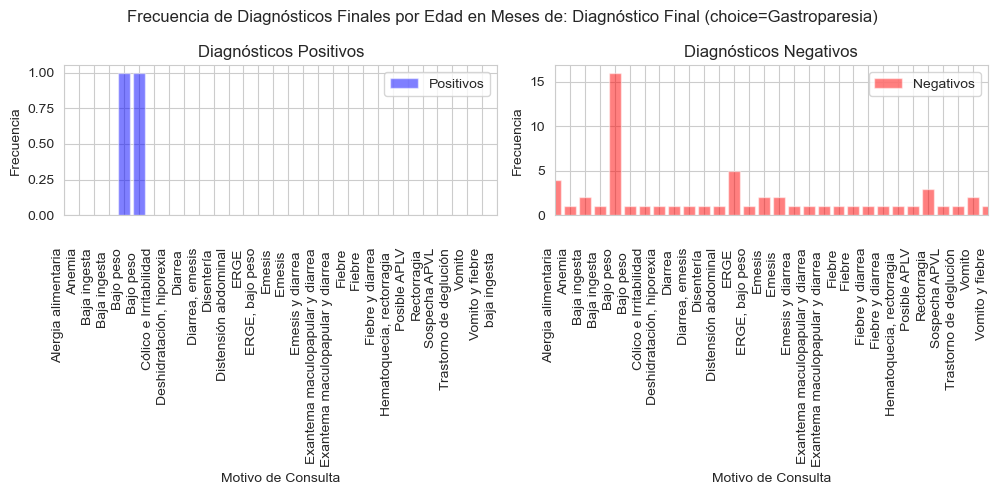

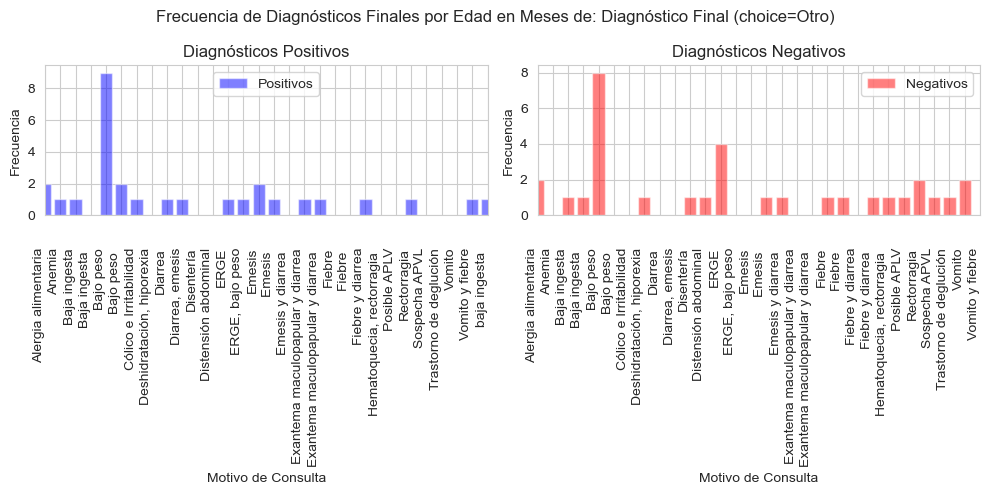

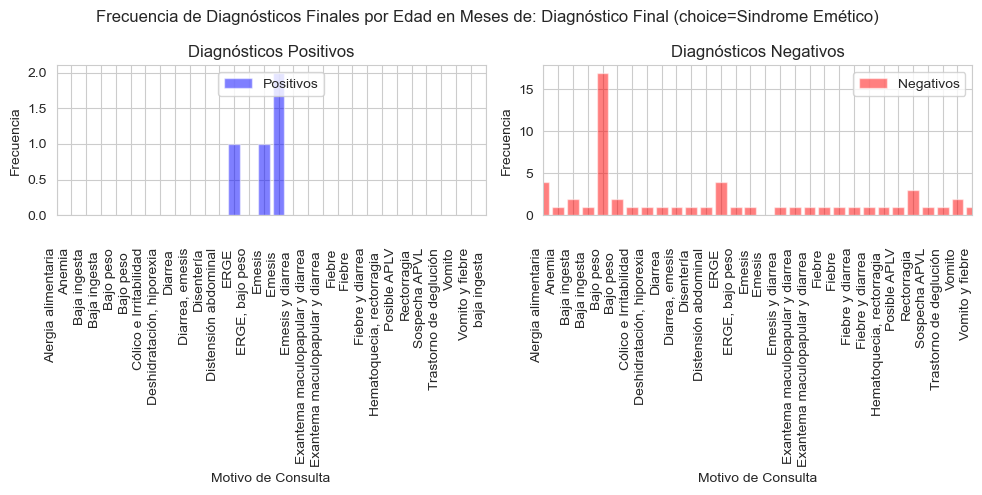

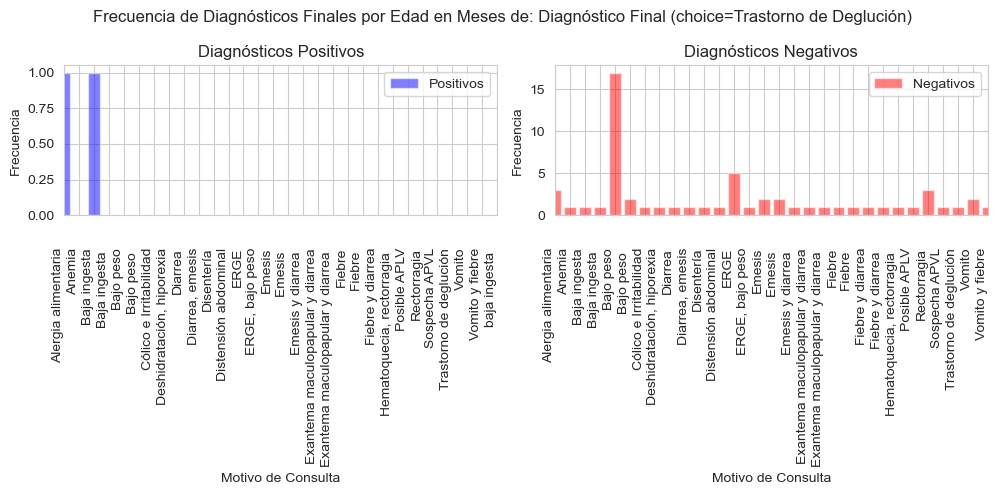

In [77]:
# Obtener todas las columnas que comienzan con "Diagnóstico Final"
columnas_edad_diagnostico = [col for col in datos_estudio.columns if col.startswith('Diagnóstico Final')]
columnas_edad_diagnostico.append('Motivo de Consulta')

# Selección de las columnas de diagnóstico final
datos_edad_diagnosticos = datos_estudio[columnas_edad_diagnostico]

# Convertir columnas de diagnóstico en filas
df_pivot_temp = datos_edad_diagnosticos.melt(id_vars='Motivo de Consulta', var_name='Diagnóstico', value_name='Estado')

# Filtrar solo las filas donde el diagnóstico es positivo (Estado == 1)
df_edad_positivos = df_pivot_temp[df_pivot_temp['Estado'] == 1]

# Filtrar solo las filas donde el diagnóstico es negativo (Estado == 0)
df_edad_negativos = df_pivot_temp[df_pivot_temp['Estado'] == 0]

# Eliminar la columna 'Estado', ya que todos los diagnósticos son positivos
df_edad_positivos = df_edad_positivos.drop(columns='Estado')

# Eliminar la columna 'Estado', ya que todos los diagnósticos son positivos
df_edad_negativos = df_edad_negativos.drop(columns='Estado')

# Agrupar los datos por edad y contar la frecuencia de diagnósticos
diagnosticos_por_edad_positivos = df_edad_positivos.groupby('Motivo de Consulta')['Diagnóstico'].value_counts().unstack().T
diagnosticos_por_edad_negativos = df_edad_negativos.groupby('Motivo de Consulta')['Diagnóstico'].value_counts().unstack().T

# Iteramos sobre las filas positivas y negativas simultáneamente
for fila_pos, fila_neg in zip(diagnosticos_por_edad_positivos.iterrows(), diagnosticos_por_edad_negativos.iterrows()):
    # Crear una nueva figura para cada par de filas
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

    # Graficar diagnósticos positivos
    ax1.bar(fila_pos[1].index, fila_pos[1].values, label='Positivos', color='blue', alpha=0.5)
    ax1.set_xlabel('Motivo de Consulta')
    ax1.set_ylabel('Frecuencia')
    ax1.set_title('Diagnósticos Positivos')
    ax1.xaxis.set_tick_params(pad=20)  # Ajustar el espacio entre las etiquetas y el eje x
    ax1.set_xlim(1, 30)
    ax1.legend()

    # Graficar diagnósticos negativos
    ax2.bar(fila_neg[1].index, fila_neg[1].values, label='Negativos', color='red', alpha=0.5)
    ax2.set_xlabel('Motivo de Consulta')
    ax2.set_ylabel('Frecuencia')
    ax2.xaxis.set_tick_params(pad=20)  # Ajustar el espacio entre las etiquetas y el eje x
    ax2.set_title('Diagnósticos Negativos')
    ax2.set_xlim(1, 30)
    ax2.legend()

    # Establecer un título común para ambos subplots
    fig.suptitle(f'Frecuencia de Diagnósticos Finales por Edad en Meses de: {fila_neg[0]}')

    # Rotar las etiquetas del eje x para mayor legibilidad
    plt.setp(ax1.get_xticklabels(), rotation=90, ha='right')
    plt.setp(ax2.get_xticklabels(), rotation=90, ha='right')

    # Mostrar la figura
    plt.tight_layout()
    plt.show()